TP 3 - Ejercicio 1 - Grupo 3: Guadalupe Sosa Ferro y Florencia Denisse Costa

# Install, importar librerías y montar Drive

In [1]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
import cv2
import pandas as pd
from sklearn import svm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


#Ítem a

## Construcción del conjunto TP3 -1

Para el ítem A se nos pedía generar un conjunto de datos en R2 que sea linealmente separable. Linealmente separable significa que existe un hiperplano lineal (recta), que puede separar los vectores de entrada en sus clases correctas; los vectores de una clase caen a un lado del hiperplano y la otra clase al otro.

Para realizar esto, generamos 40 puntos aleatorios en el rango de valores entre 0 y 5 tanto en el eje x como en el eje y. Veinte de ellos son de la clase 1 y se encuentran entre 0 y 2,5 en el eje x y 2,5 y 5 en el eje y. Los otros 20 son de la clase -1 y toman valores entre 2,5 y 5 en el eje x y 0 y 2,5 en el eje y.


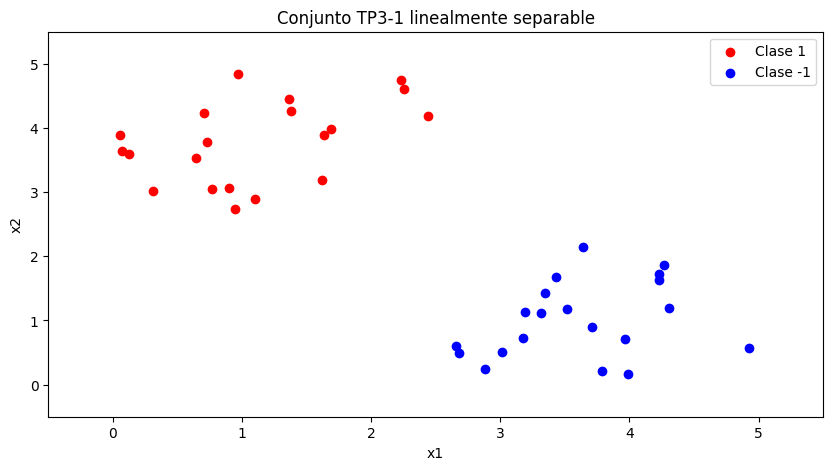

In [3]:
#Fácil de separar

np.random.seed(3)
p = 40 # Cantidad de puntos
k = int(p/2)

# Generamos puntos aleatorios en el cuadrado [0,5]x[0,5]
TP3_1 = np.zeros((p,3)) # (x1, x2, clase)
TP3_1[:k,:2] = np.random.uniform([0,2.5], [2.5,5], size=(k,2))
TP3_1[k:,:2] = np.random.uniform([2.5,0], [5,2.5], size=(k,2))
TP3_1[:k,2] = 1
TP3_1[k:,2] = -1

plt.figure(figsize=(10,5))
plt.scatter(TP3_1[:k,0], TP3_1[:k,1], c='red', label='Clase 1')
plt.scatter(TP3_1[k:,0], TP3_1[k:,1], c='blue', label='Clase -1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-0.5,5.5])
plt.ylim([-0.5,5.5])
plt.title('Conjunto TP3-1 linealmente separable')
plt.show()

## Perceptron

Para separar los puntos en las dos clases utilizamos el perceptrón simple. Estos son los pasos que sigue el algoritmo del perceptrón:
1. Primero inicializamos las variables que vamos a utilizar: el número de iteraciones (i), w (el vector de pesos, que inicializamos en 1 y cuyo tamaño es igual al número de características (valor en x y valor en y) + 1, ya que se incluye el umbral), el error y el error_min (que se irán actualizando), y w_min (que guardará el vector de pesos que corresponde al menor error). En cuanto el eta de aprendizaje y la cota, ambos son parámetros de la función. Esto permite modificarlos con mayor facilidad.

2. Luego tenemos el bucle `while`, que es controlado por el valor del error y la cantidad de iteraciones. Es decir, se continúa ejecutando el código dentro de este bucle mientras el error sea mayor a 0 y la cantidad de iteraciones sea menor a la cota.

3. Dentro del `while`, primero se toma un elemento del conjunto de datos. Este elemento se elige al azar en cada iteración, y es posible que se repita entre bucles. Esto significa que el algoritmo es estocástico, sin embargo, para probar nuestro código, decidimos utilizar una semilla para así obtener resultados reproducibles.

4. Luego se calcula la excitación y activación. La excitación se calcula como el producto escalar entre el elemento seleccionado y el vector de pesos w. El elemento x es un array de 2 elementos, mientras que w tiene 3, por lo que a x se le agrega un 1. Luego se le aplica la función signo a la excitación, para obtener la activación. Esta valdrá 1 o -1, según el signo de la excitación. 

5. Ahora es posible actualizar el valor de w. Primero se calcula la diferencia entre la clase del elemento seleccionado y la activación. Esta diferencia entonces valdrá 0 si la predicción es correcta, o 2 o -2 si no lo es. Luego se realiza el producto escalar entre esta diferencia y el elemento seleccionado. Por último, esto dará un escalar que se multiplica por el eta de aprendizaje. Esto es el delta w, que se le suma al w. Por lo tanto, si la predicción es correcta, el delta w valdrá 0, ya que no es necesario actualizar el vector de pesos. 

6. Por último, se calcula el error como la cantidad de predicciones incorrectas. Si el error es menor al error mínimo, entonces se actualiza este y el w mínimo. Cuando se salga del bucle `while`, se tendrá entonces el w_min, es decir el vector de pesos asociado al menor error.

In [4]:
def perceptron(x, y, COTA, eta, seed):
  p, N = x.shape
  i = 0
  w = np.ones(N+1) # se puede inicializar con valores aleatorios
  error = 1
  error_min = p * 2
  w_min = w.copy()
  np.random.seed(seed) 
  
  while error > 0 and i < COTA:
    i_x = np.random.randint(p) # Tomar un número ix al azar entre 1 y p
    h = np.dot(np.append(x[i_x],1), w) # Calcular la excitación h = x[ix].w
    O = np.sign(h) # Calcular la activación O = signo(h)
    delta_w = eta * (y[i_x] - O) * np.append(x[i_x],1) # Δw = η ∗ (y[ix] − O).x[ix]
    w += delta_w # Actualizar el vector de pesos
    error = calcular_error(x, y, w, p) # Calcular el error
    if error < error_min:
      error_min = error # Actualizar el error mínimo
      w_min = w.copy() # Actualizar el vector de pesos mínimo
    i += 1
  return w_min

def calcular_error(x, y, w, p):
  error = 0
  for i in range(p):
    h = np.dot(np.append(x[i],1), w) # Calcular la excitación h = x[i].w
    O = np.sign(h) # Calcular la activación O = signo(h)
    if O != y[i]: # El error es la cantidad de predicciones incorrectas
      error += 1 
  return error

In [5]:
x = TP3_1[:, :2]
y = TP3_1[:, 2]
COTA = 2000
eta = 0.05
w_min_a = perceptron(x, y, COTA, eta, 3)

In [6]:
print(w_min_a) # w_min = [w1   w2   w0]

[-0.55370449  0.57941783  0.5       ]


`w_min` es un array que contiene como primer elemento a w1, luego a w2 y por último a w0. Este vector de pesos nos permitirá calcular la ecuación del hiperplano, que en R2 es una recta.

Ecuación del hiperplano:

$w_1x + w_2y + w_0 = 0 $

Reorganizando esta ecuación podemos fácilmente obtener las fórmulas de la pendiente y la ordenada al origen de la recta: 

$y = -\frac{w_0}{w_2}-\frac{w_1}{w_2}x$

$m = -\frac{w_1}{w_2}$

$b = -\frac{w_0}{w_2}$

In [7]:
def graficarPuntosHiperplano(puntos, w_min, tipo, nombre_conj, ubicacion):
  cant_puntos = len(puntos)
  k = int(cant_puntos/2)
  m = w_min[0]/(-w_min[1]) # -w_1/w_2
  print(f"m = {m}")
  b = -w_min[2]/(w_min[1]) # -w_0/w_2
  print(f"b = {b}")
  valores_x = np.linspace(-0.5, 5.5, cant_puntos)
  valores_y = m*valores_x + b # Recta obtenida por el perceptron

  plt.figure(figsize=(10,5))
  plt.scatter(puntos[:k,0], puntos[:k,1], c='red', label='Clase 1')
  plt.scatter(puntos[k:,0], puntos[k:,1], c='blue', label='Clase -1') # Puntos del conjunto
  # Hiperplano obtenido
  if b<0:
    plt.plot(valores_x, valores_y, "green", label=f"Hiperplano: y = {round(m,1)}x{round(b,1)}") 
  elif b>0:
    plt.plot(valores_x, valores_y, "green", label=f"Hiperplano: y = {round(m,1)}x+{round(b,1)}")
  else:
    plt.plot(valores_x, valores_y, "green", label=f"Hiperplano: y = {round(m,1)}x") 
  plt.legend(loc=ubicacion)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.xlim([-0.5,5.5])
  plt.ylim([-0.5,5.5])
  plt.title(f'Conjunto {nombre_conj} con hiperplano ({tipo})')
  plt.show()

  return

m = 0.955622118877237
b = -0.8629351364869445


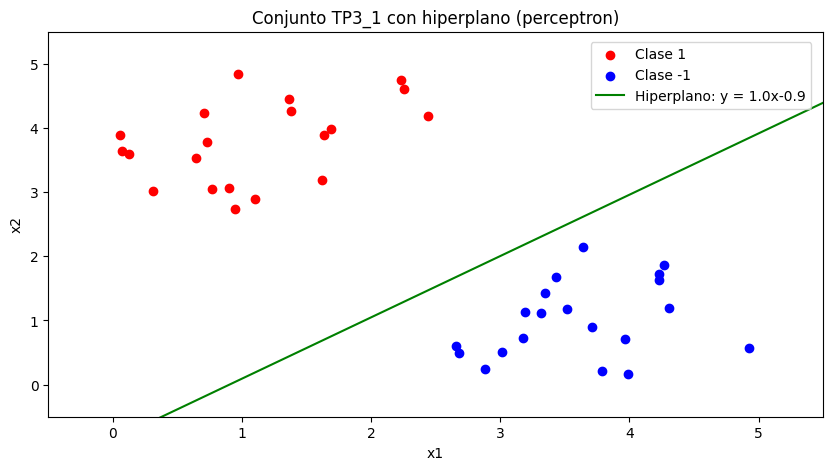

In [8]:
graficarPuntosHiperplano(TP3_1, w_min_a, "perceptron", "TP3_1", [0.7,0.8])

El hiperplano calculador logra separar las dos clases correctamente.

A simple vista podemos ver que este no es el hiperplano óptimo. Esto se debe a que el hiperplano no presenta margen máximo, es decir, no se maximiza el margen entre las dos clases; está mucho más cerca de los puntos de la clase -1. (margen: distancia del ejemplo más cercano al hiperplano).

Al cambiar el valor de np.random.seed el hiperplano cambia, y en algunos casos la clasificación es menos robusta.

# Ítem  b

Para el ítem B tuvimos que buscar el hiperplano óptimo o cercano a este, utilizando el hiperplano del perceptrón.

Primero calculamos las distancias desde el hiperplano a cada punto del conjunto. Luego ordenamos estas distancias de menor a mayor, y seleccionamos de cada clase los 5 puntos más cercanos. Luego seleccionamos 2 puntos de una clase y 1 de la otra. Así, formamos distintas combinaciones de puntos.

Con cada una de estas combinaciones de 3 puntos cercanos al hiperplano, realizamos lo siguiente. Primero obtuvimos la recta entre los dos puntos de la misma clase (puntos 1 y 2). Luego calculamos la normal a esa recta, que pasa por el punto 3, el punto de la otra clase. Luego necesitamos el punto de intersección entre la recta y la normal, para poder calcular el punto medio entre este punto y el punto 3. Finalmente el hiperplano será paralelo a la recta (misma pendiente) y pasará por el punto medio. 

In [9]:
def calcularDistanciaRectaPunto(punto, w_min):
  a = w_min[0]
  b = w_min[1]
  c = w_min[2]
  x_0, y_0 = punto
  distancia = abs(a*x_0 + b*y_0 + c) / math.sqrt(a**2 + b**2)
  return distancia

In [10]:
def masCercanos(x, distancias, l):
  i_ordenados = np.argsort(distancias)
  mas_cercanos = []
  for i in range(l):
    mas_cercanos.append(x[i_ordenados[i]])
  return mas_cercanos

In [11]:
def seleccionarPuntos(mas_cercanos_1, mas_cercanos_2):
  combinaciones = list(itertools.combinations(mas_cercanos_1, 2))
  puntos = []
  for combinacion in combinaciones:
    for punto in mas_cercanos_2:
      puntos.append((*combinacion, punto)) 
  return puntos

In [12]:
def calcularRecta(punto_1, punto_2):
  x_1 = punto_1[0]
  y_1 = punto_1[1]
  x_2 = punto_2[0]
  y_2 = punto_2[1]
  # Calcular la pendiente
  m = (y_2 - y_1) / (x_2 - x_1)
  # Calcular la intersección en y
  b = y_1 - m*x_1
  coef = np.array([m,b])
  return coef

In [13]:
def calcularNormal(coef, punto_3):
  # y = m*x + b
  m, b = coef
  # Calcular la pendiente de la recta perpendicular
  m_p = -1/m
  # Construir la ecuación de la recta perpendicular usando el punto dado y la pendiente obtenida
  x_3 = punto_3[0]
  y_3 = punto_3[1]
  b_p = y_3 - m_p*x_3
  # La normal es la recta perpendicular que pasa por el punto (x_3, y_3)
  coef_normal = np.array([m_p, b_p]) 
  return coef_normal

In [14]:
def calcularInterseccion(coef, coef_normal):
  m_1, b_1 = coef
  m_2, b_2 = coef_normal
  # Calcular intersección
  x_int = (b_2 - b_1) / (m_1 - m_2)
  y_int = m_1 * x_int + b_1
  punto_int = np.array([x_int, y_int])
  return punto_int

In [15]:
def calcularPuntoMedio(punto_1, punto_2):
  x_1, y_1 = punto_1
  x_2, y_2 = punto_2
  p_medio = ((x_1 + x_2) / 2, (y_1 + y_2) / 2)
  return p_medio

In [16]:
def calcularRectaParalela(coef, punto):
  m, b = coef
  x, y = punto
  # Calcular pendiente de la nueva recta
  m_2 = m
  # Calcular ordenada al origen de la nueva recta
  b_2 = y - m_2 * x
  coef_paralela = np.array([m_2, b_2])
  return coef_paralela

In [17]:
def graficarPuntosHiperplanoItemB(puntos, coef, w_min, combinacion, punto_int, p_medio):
  punto_1, punto_2, punto_3 = combinacion

  cant_puntos = len(puntos)
  k = int(cant_puntos/2)

  # Calcular puntos del nuevo hiperplano
  m, b = coef
  valores_x = np.linspace(-0.5, 4.7, cant_puntos)
  valores_y = m*valores_x + b 

  # Calcular puntos del hiperplano obtenido anteriormente
  m_1 = w_min[0]/(-w_min[1]) # -w_1/w_2
  b_1 = -w_min[2]/(w_min[1]) # -w_0/w_2
  valores_x_1 = np.linspace(-0.5, 5, cant_puntos)
  valores_y_1 = m_1*valores_x_1 + b_1 
  
  # Graficar puntos e hiperplano
  plt.figure(figsize=(10,5))
  plt.scatter(puntos[:k,0], puntos[:k,1], c='red', label='Clase 1')
  plt.scatter(puntos[k:,0], puntos[k:,1], c='blue', label='Clase -1')
  plt.scatter(punto_1[0], punto_1[1], c="pink", label="Punto 1") 
  plt.scatter(punto_2[0], punto_2[1], c="black", label="Punto 2")
  plt.scatter(punto_3[0], punto_3[1], c="cyan", label="Punto 3")
  
  if b_1<0:
    plt.plot(valores_x_1, valores_y_1, "green", label=f"Hiperplano perceptrón: y = {round(m_1,1)}x{round(b_1,1)}")
  elif b_1>0:
    plt.plot(valores_x_1, valores_y_1, "green", label=f"Hiperplano perceptrón: y = {round(m_1,1)}x+{round(b_1,1)}")
  else:
    plt.plot(valores_x_1, valores_y_1, "green", label=f"Hiperplano perceptrón: y = {round(m_1,1)}x")
  if b<0:
    plt.plot(valores_x, valores_y, "orange", label=f"Hiperplano nuevo: y = {round(m,1)}x{round(b,1)}") 
  elif b>0:
    plt.plot(valores_x, valores_y, "orange", label=f"Hiperplano nuevo: y = {round(m,1)}x+{round(b,1)}")
  else:
    plt.plot(valores_x, valores_y, "orange", label=f"Hiperplano nuevo: y = {round(m,1)}x") 

  # # Recta
  # m1 = (punto_2[1] - punto_1[1]) / (punto_2[0] - punto_1[0])
  # x_line = np.linspace(punto_1[0], punto_2[0], 100)
  # y_line = m1 * (x_line - punto_1[0]) + punto_1[1]
  # plt.plot(x_line, y_line, color='orange', label='Recta entre los dos puntos')

  # # Normal
  # m2 = -1 / m1
  # x = np.linspace(punto_3[0], punto_int[0], 100)  # Rango de valores de x para la gráfica
  # y = m2 * (x - punto_3[0]) + punto_3[1]
  # plt.plot(x, y, color='purple', label='Recta normal')

  # # Puntos
  #plt.scatter(punto_int[0], punto_int[1], c="deeppink", label="Punto de intersección")  
  #plt.scatter(p_medio[0], p_medio[1], c="yellow", label="Punto medio") 

  plt.legend(loc=(0.6,0.6))
  #plt.legend()
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.xlim([-0.5,8.5])
  plt.ylim([-0.5,8.5])
  # plt.xlim([-0.5,5.5])
  # plt.ylim([-0.5,5.5])
  #plt.axis('equal')
  #plt.grid(True)
  plt.title('Conjunto TP3-1 linealmente separable con hiperplano')
  plt.show()
  return

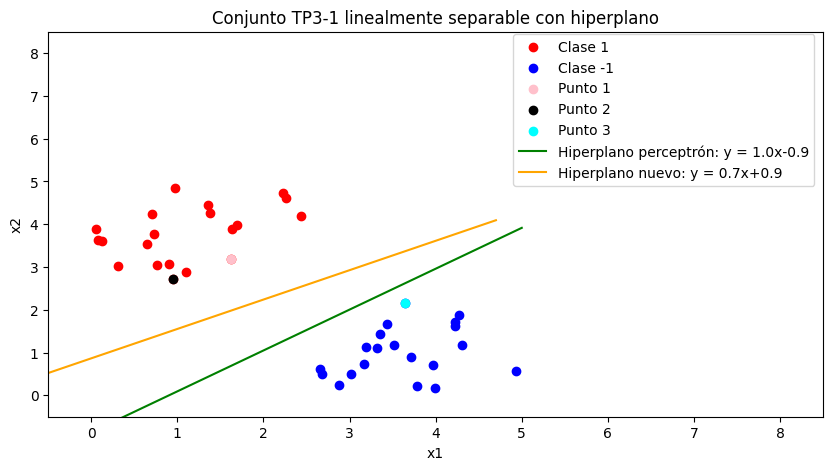

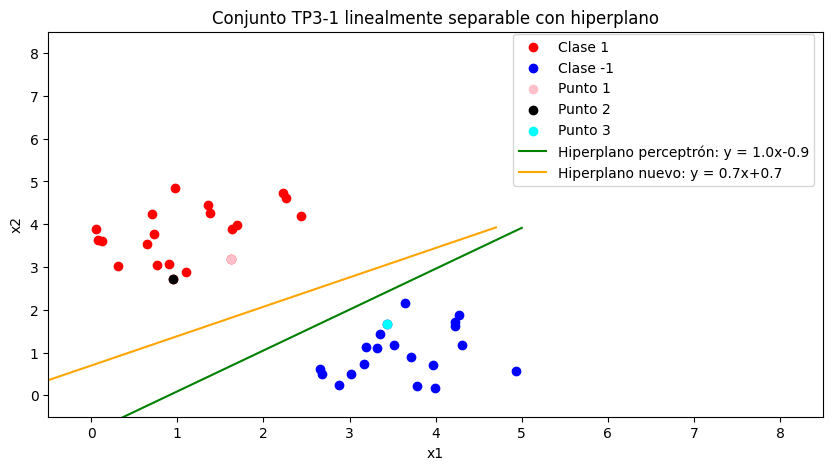

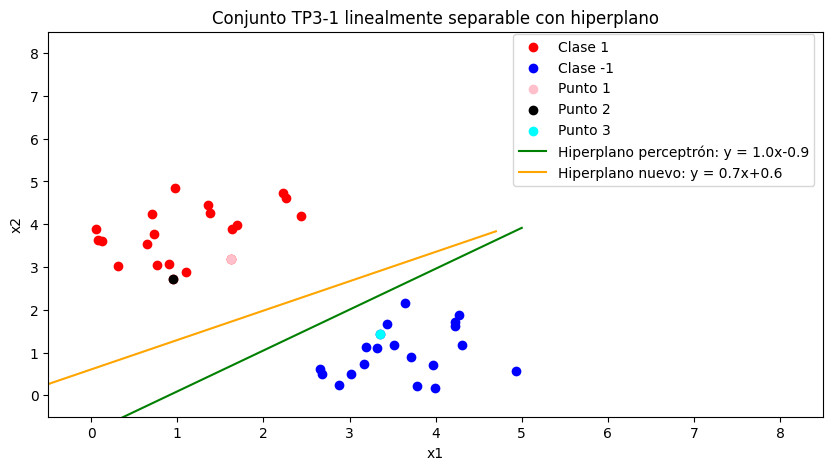

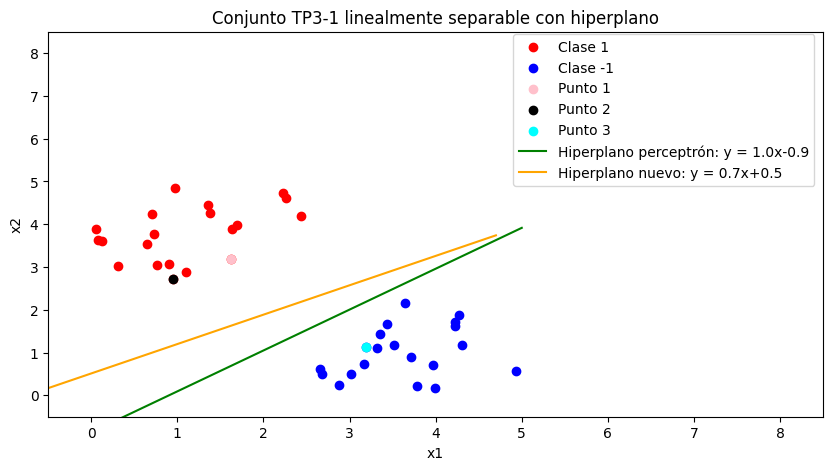

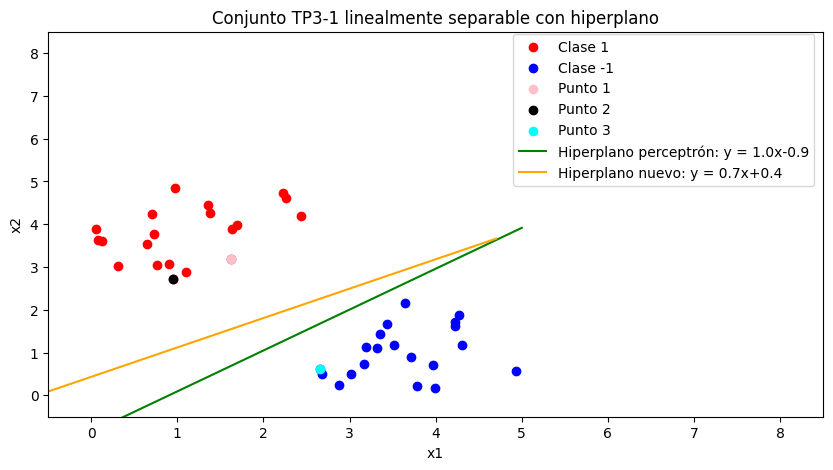

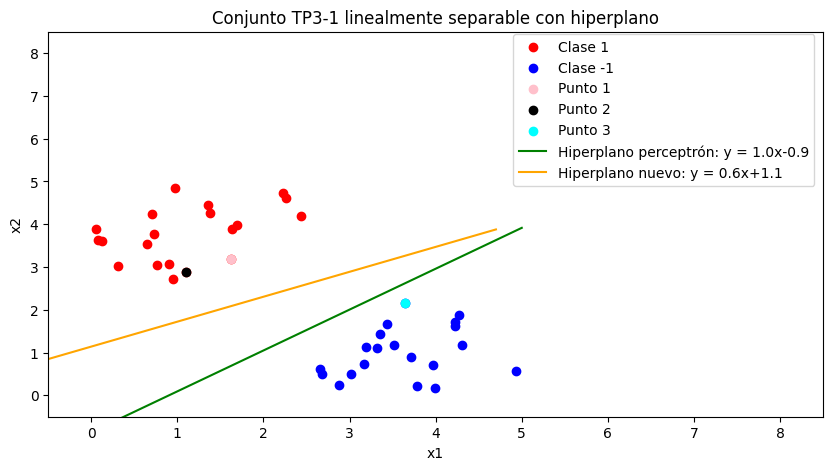

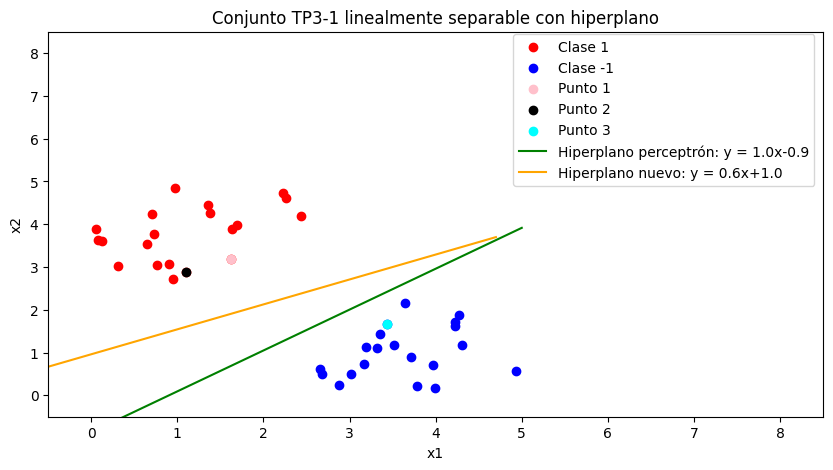

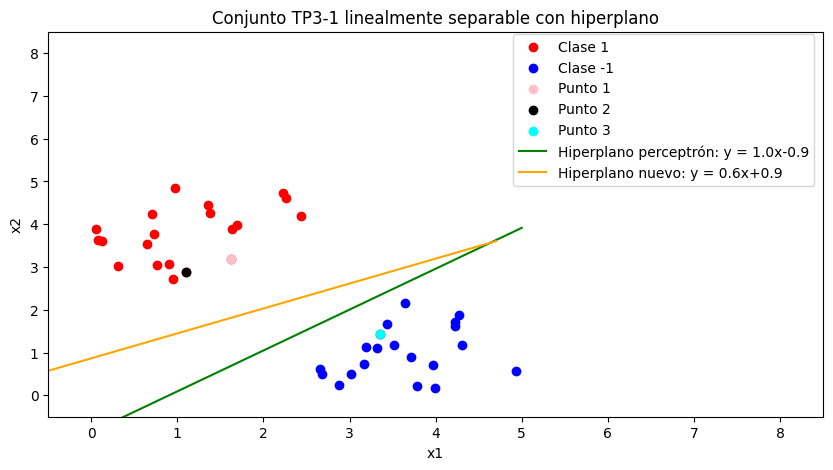

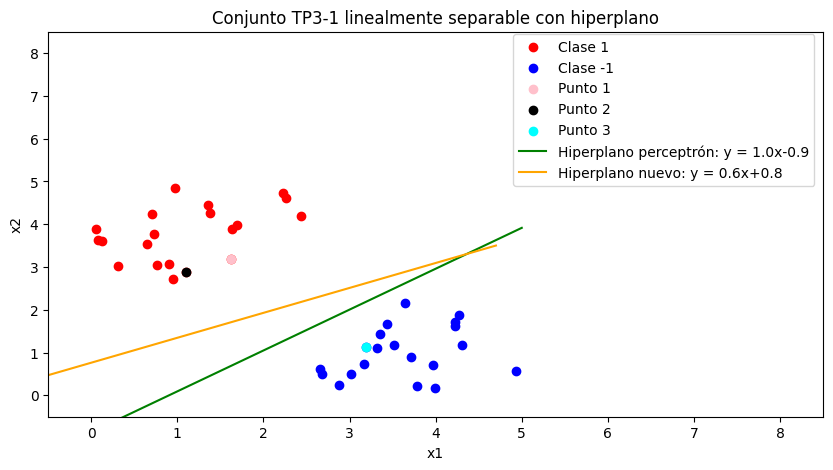

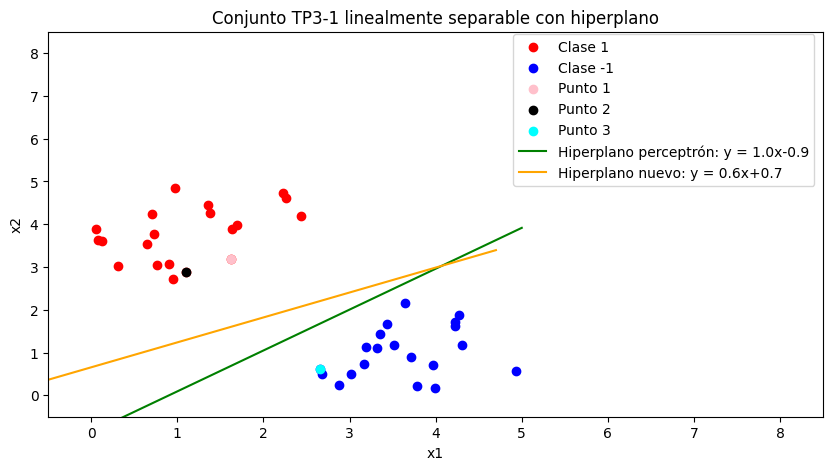

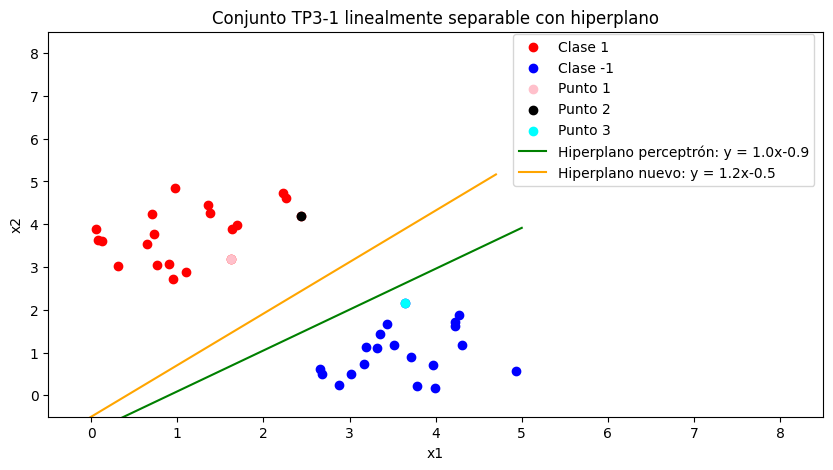

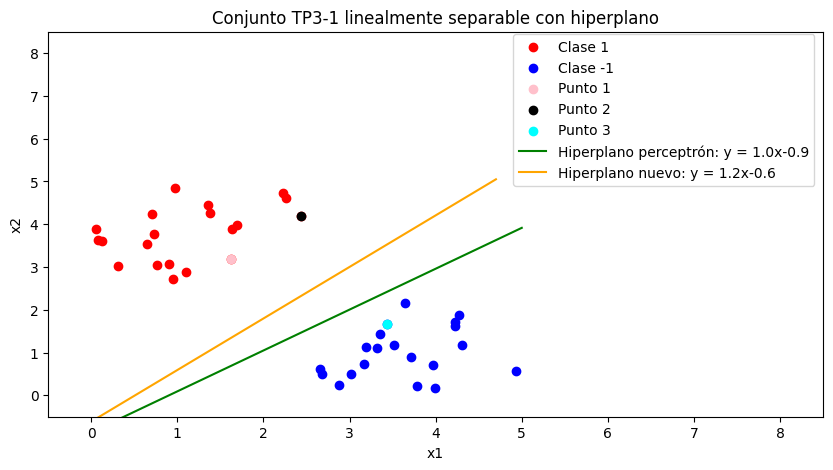

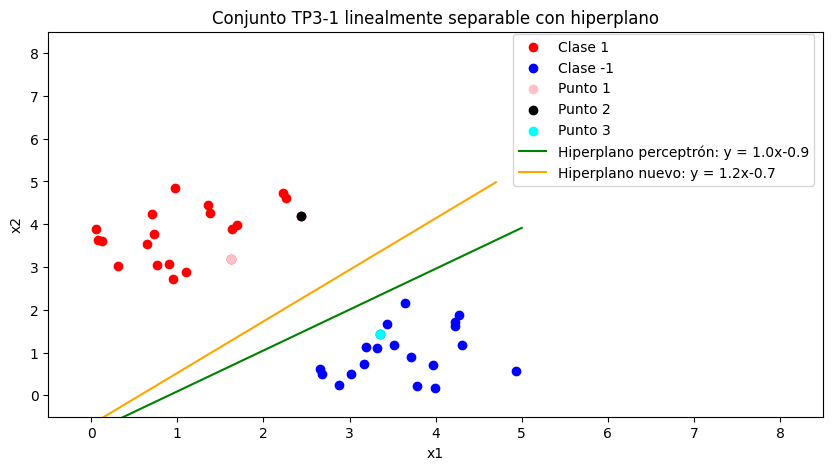

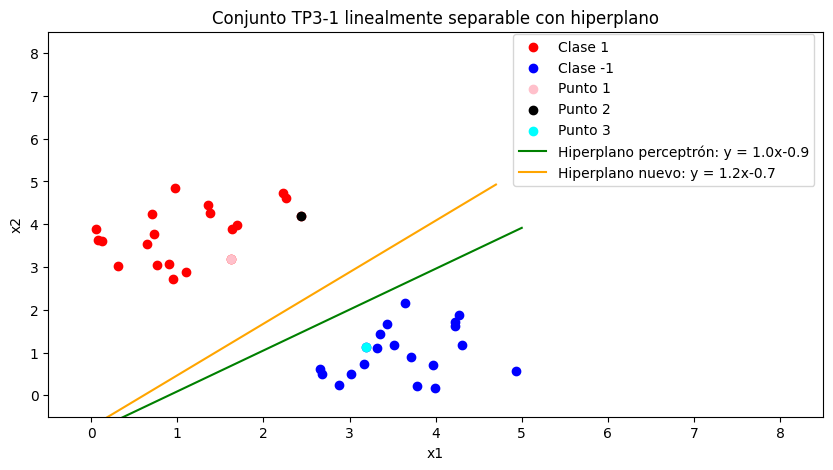

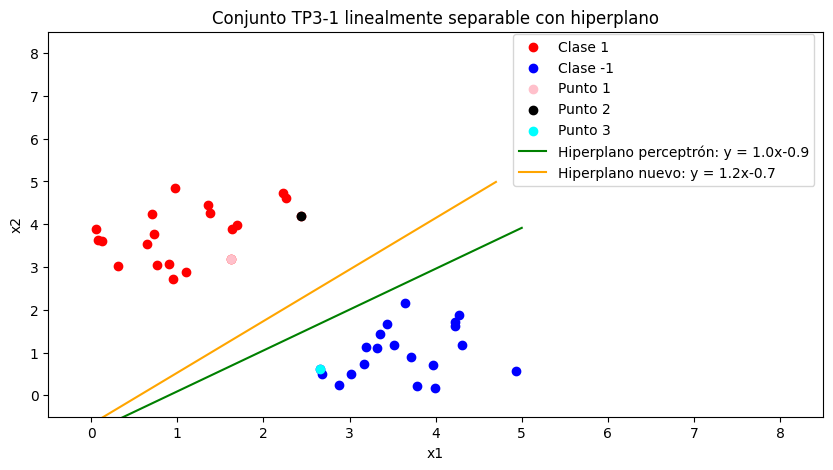

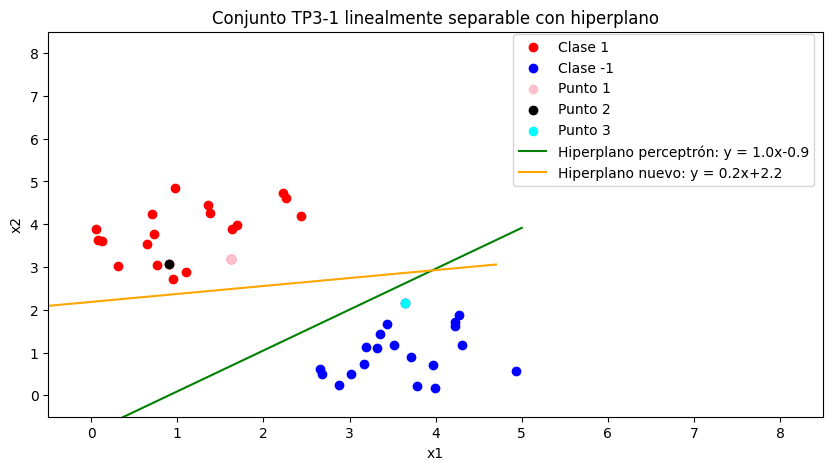

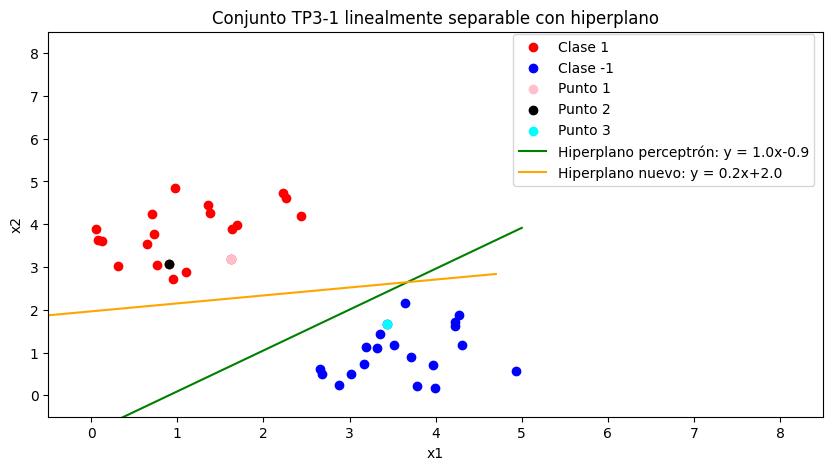

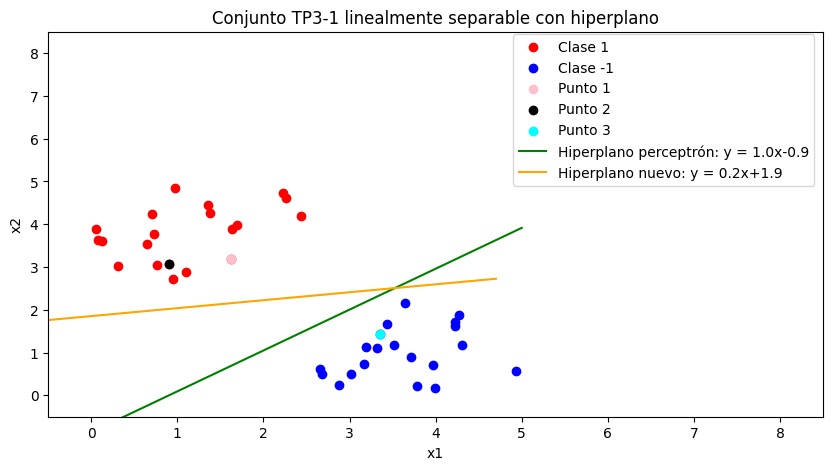

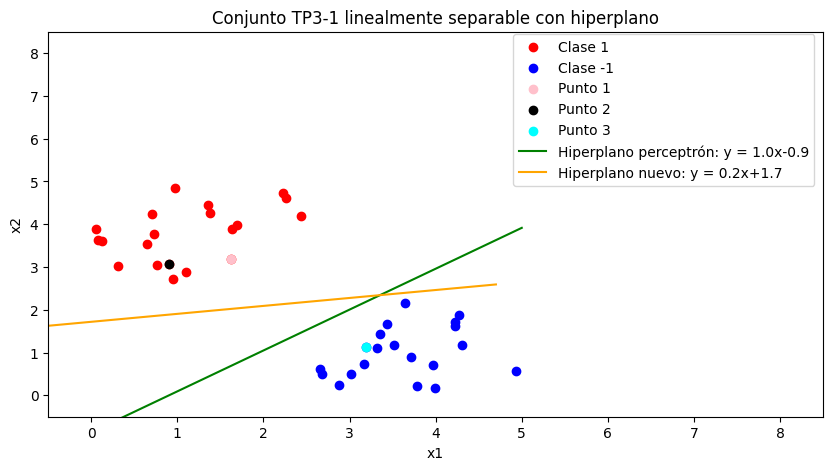

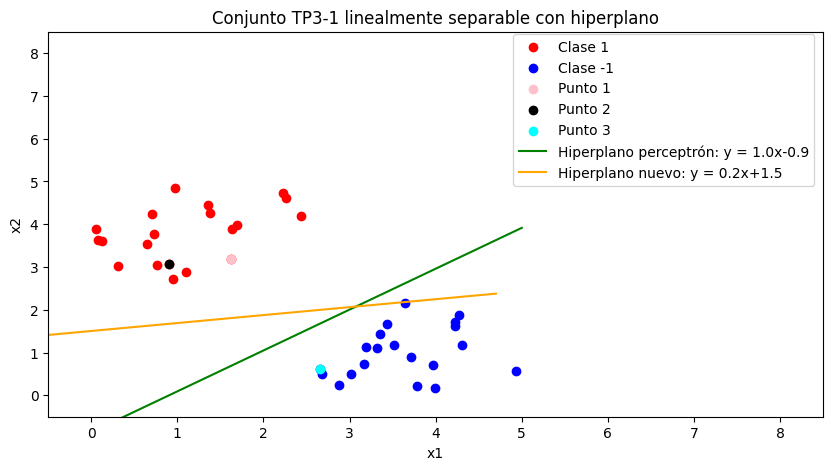

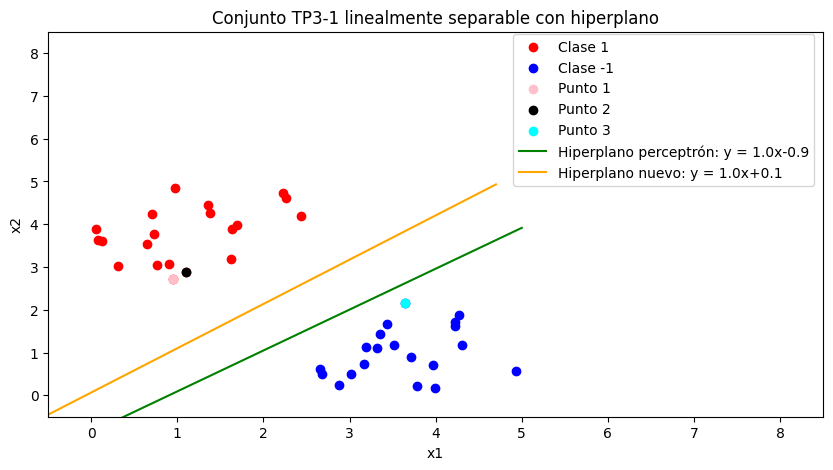

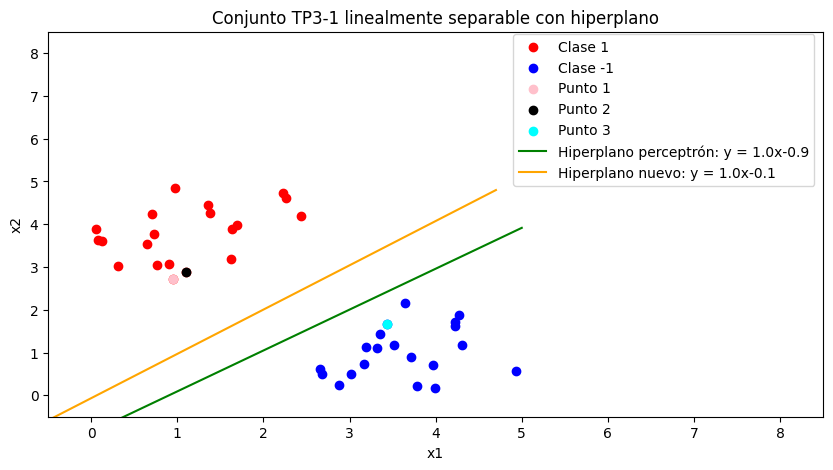

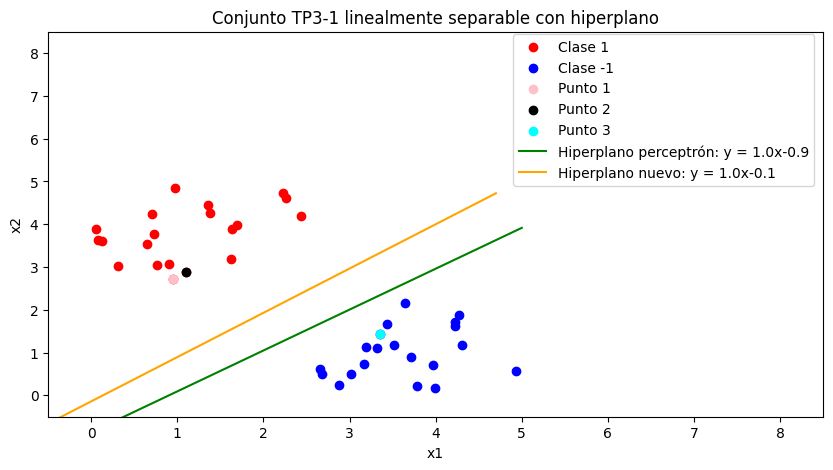

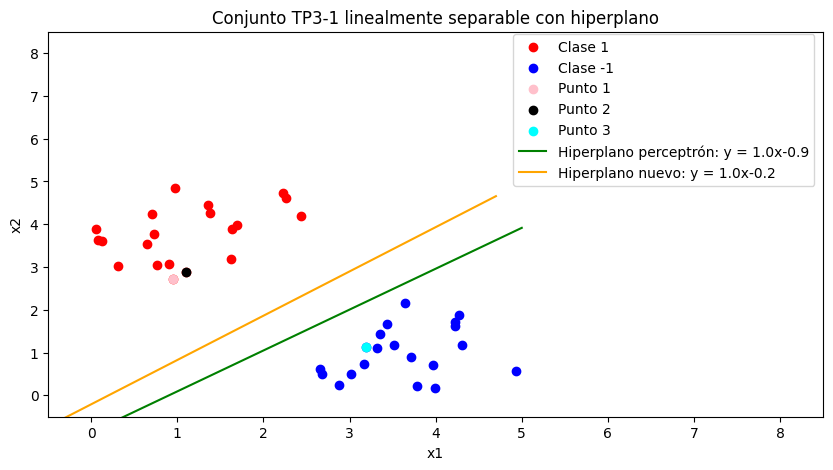

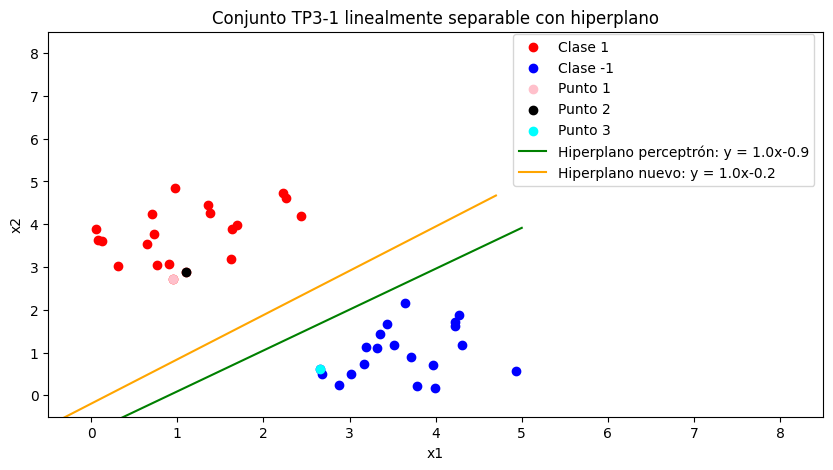

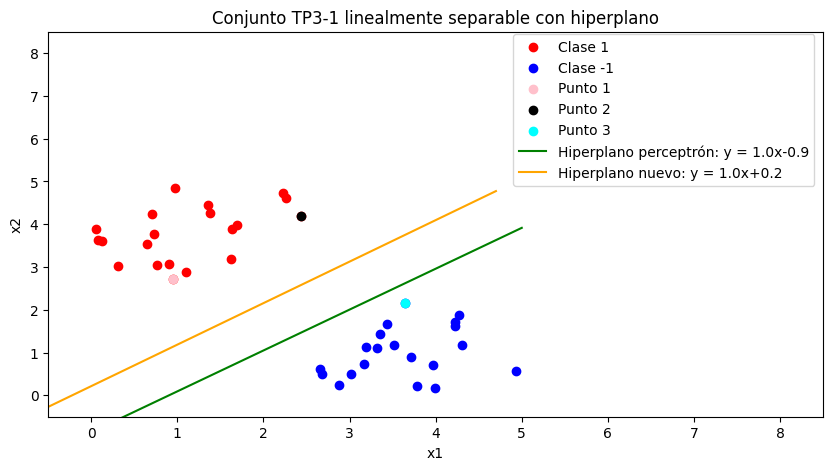

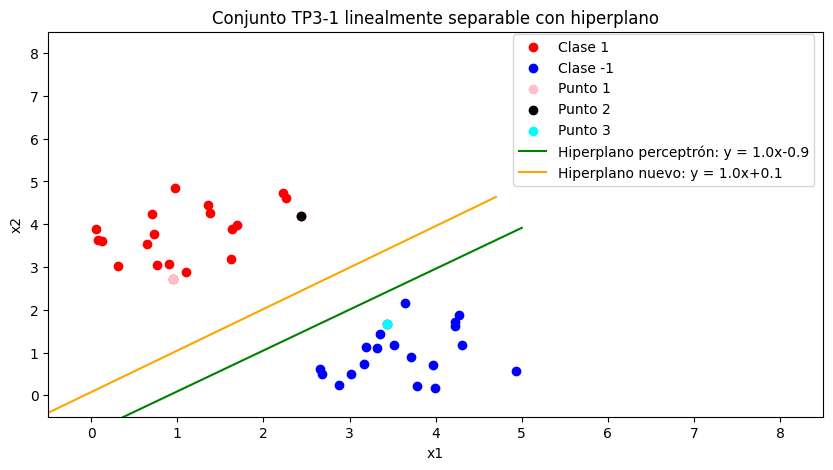

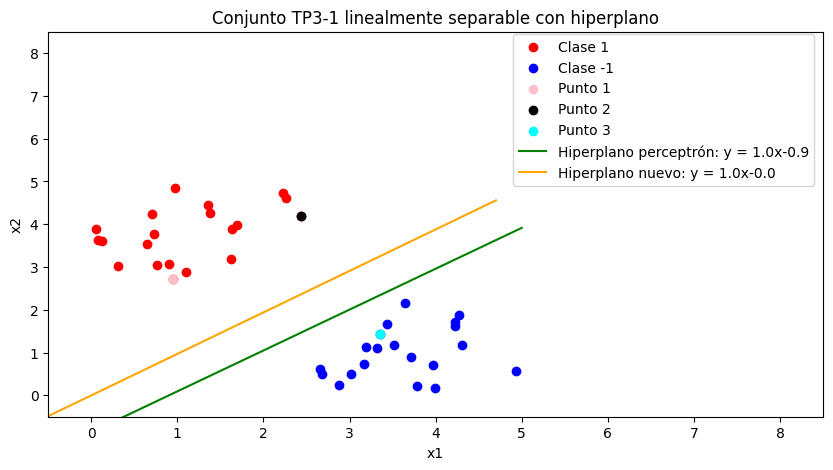

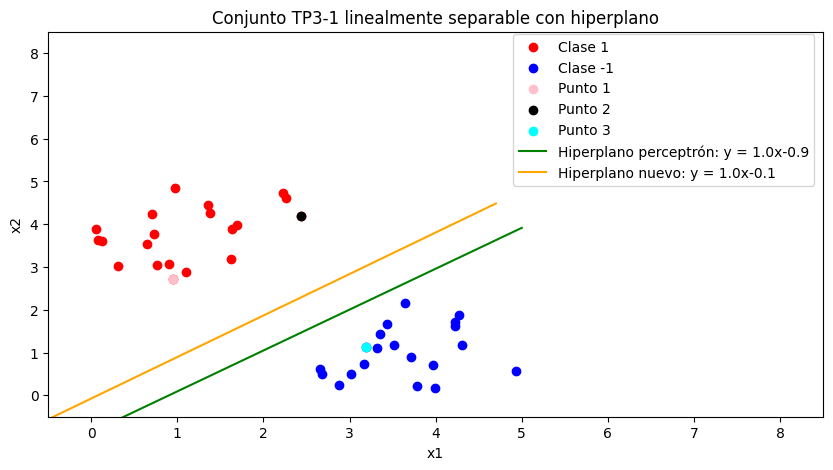

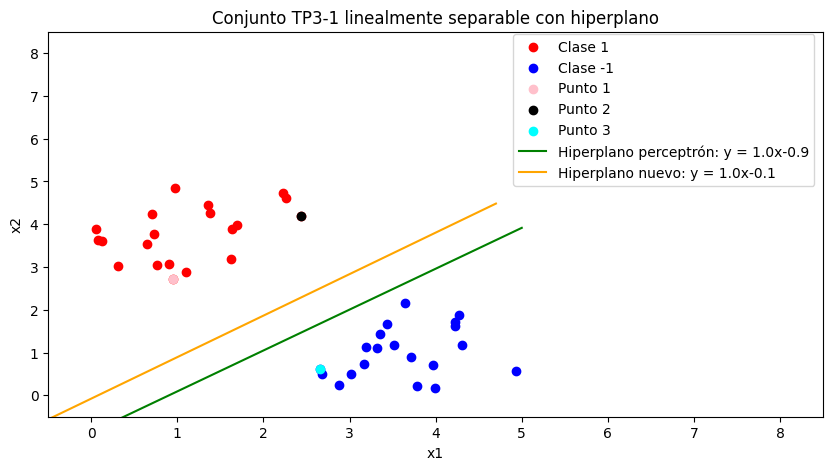

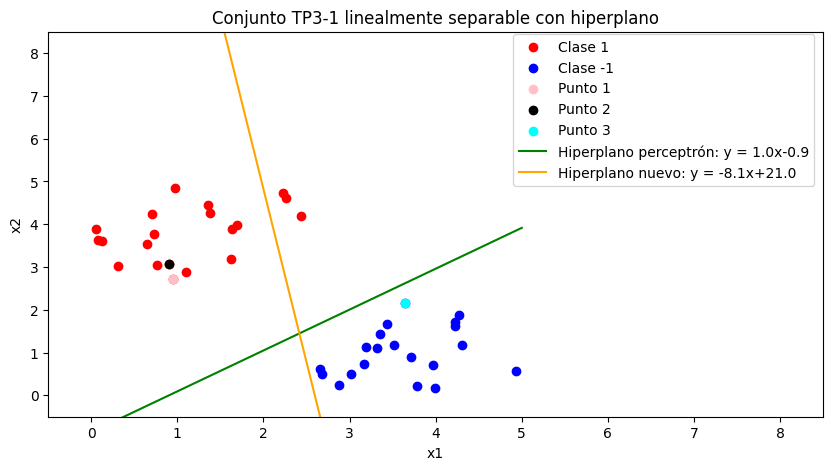

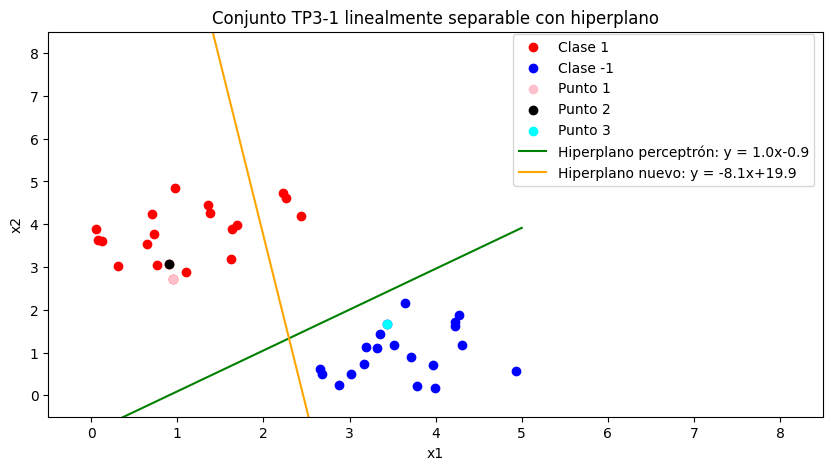

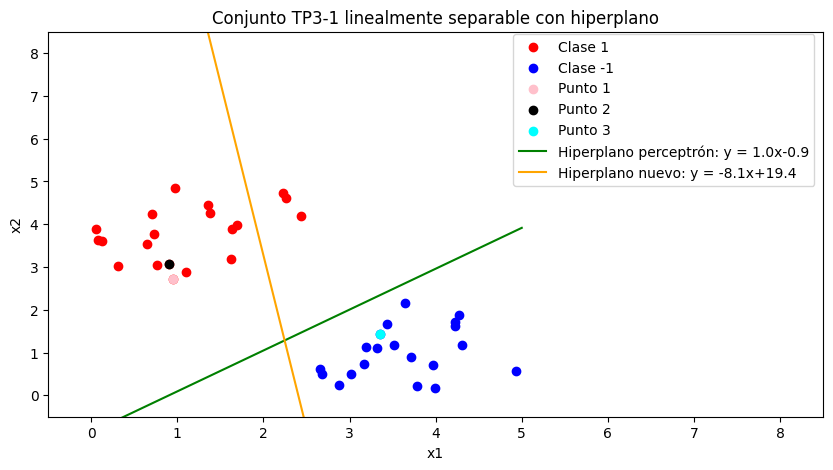

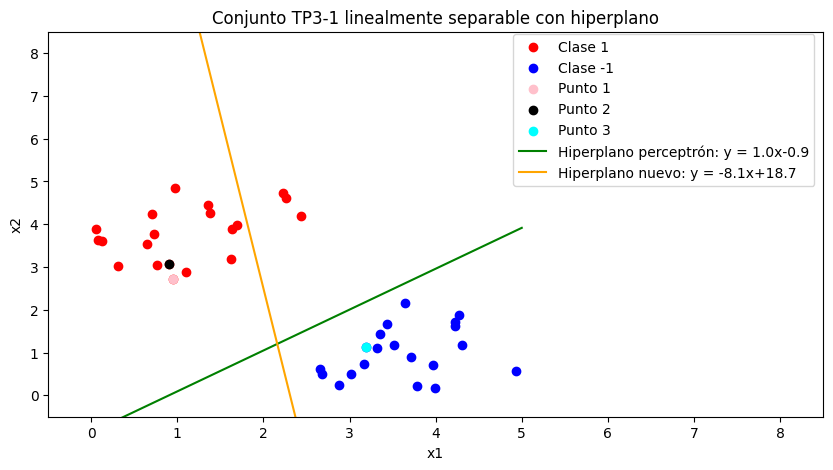

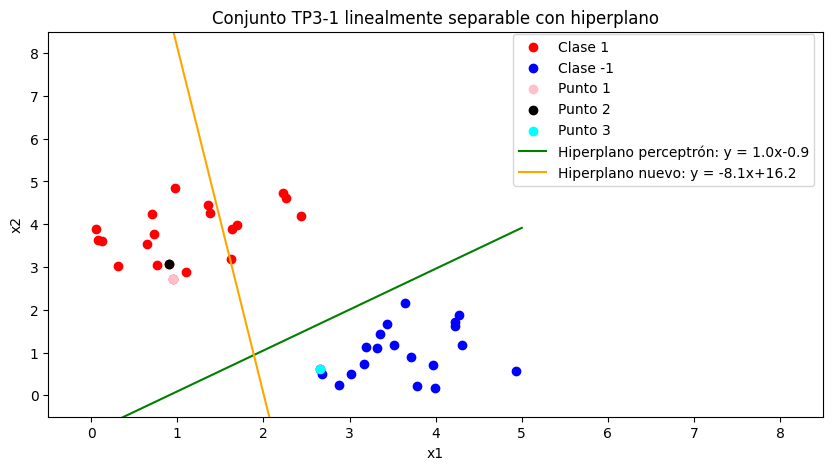

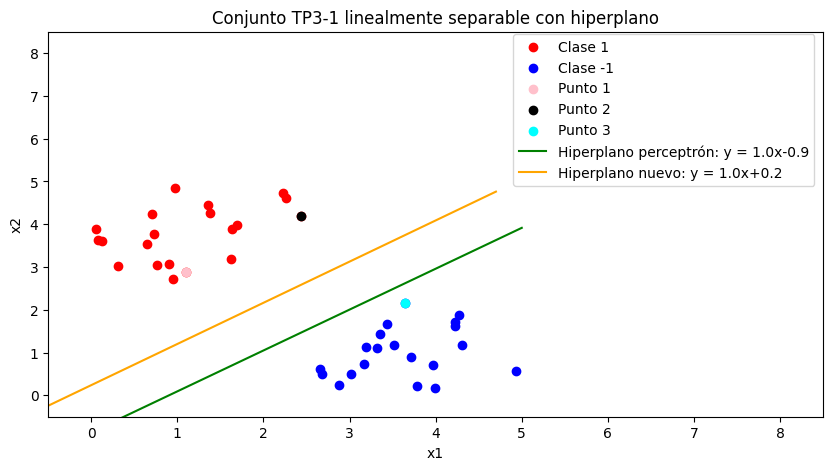

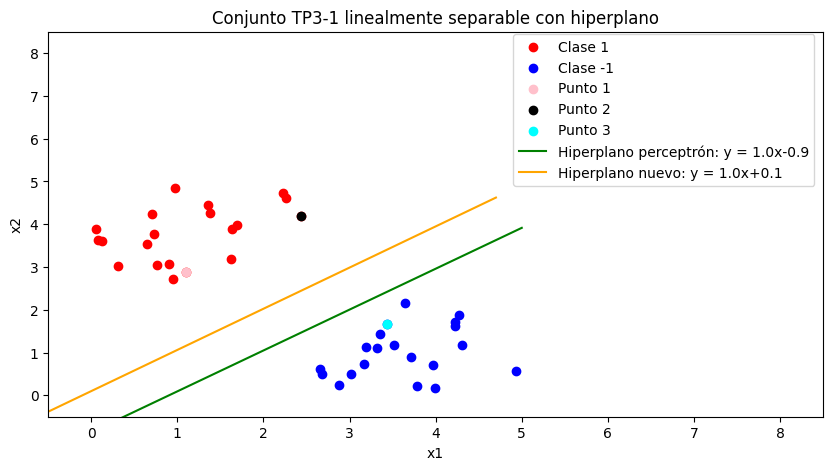

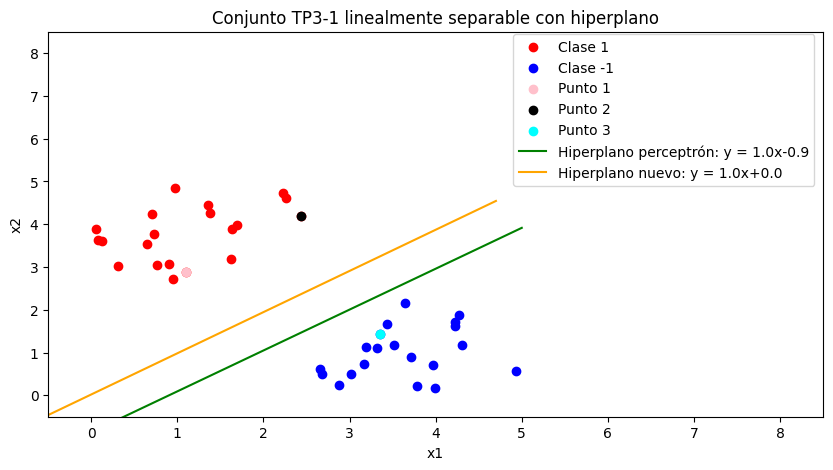

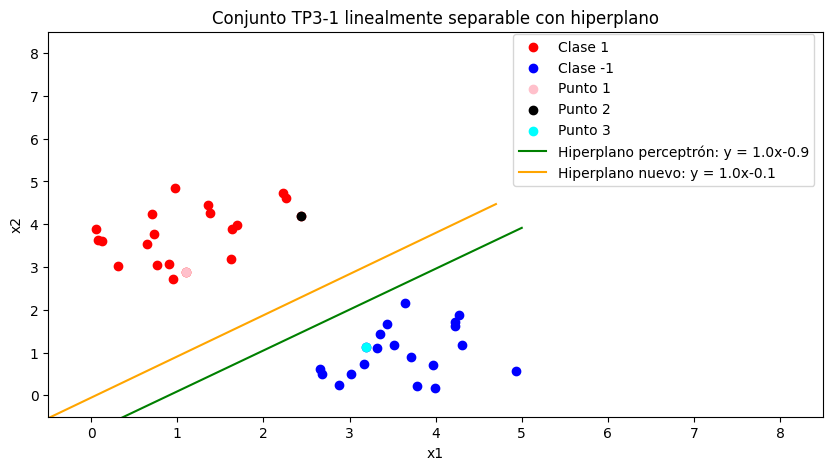

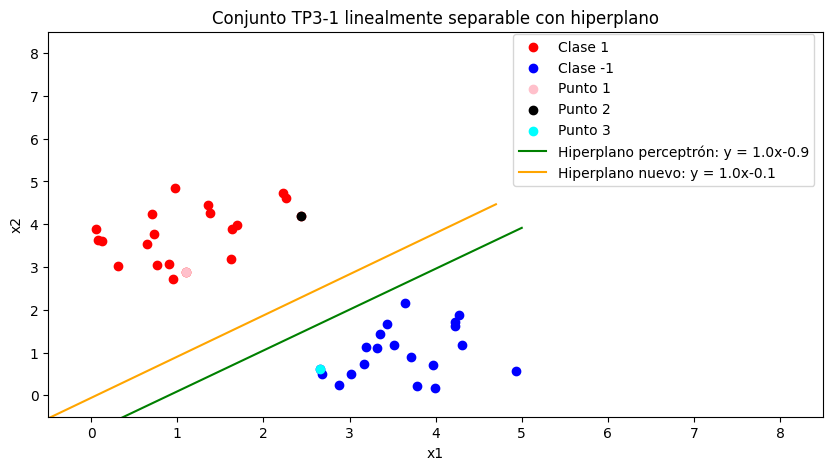

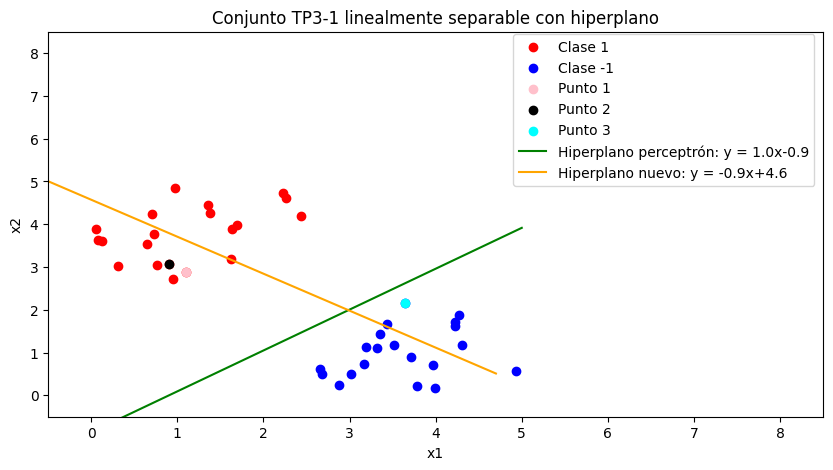

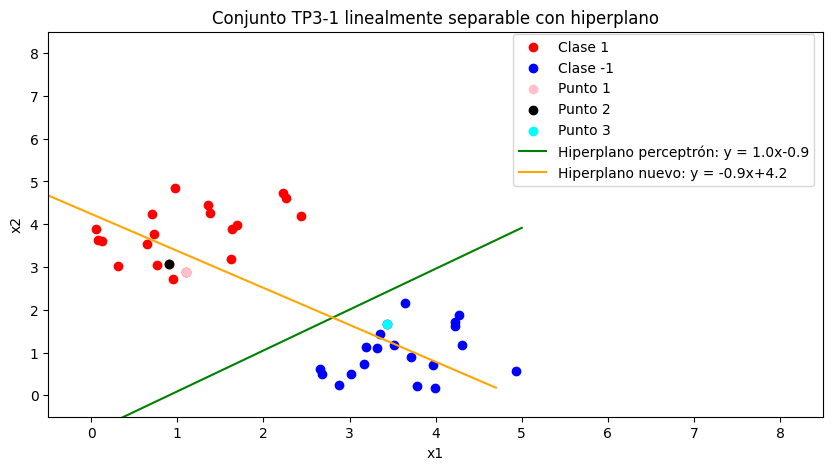

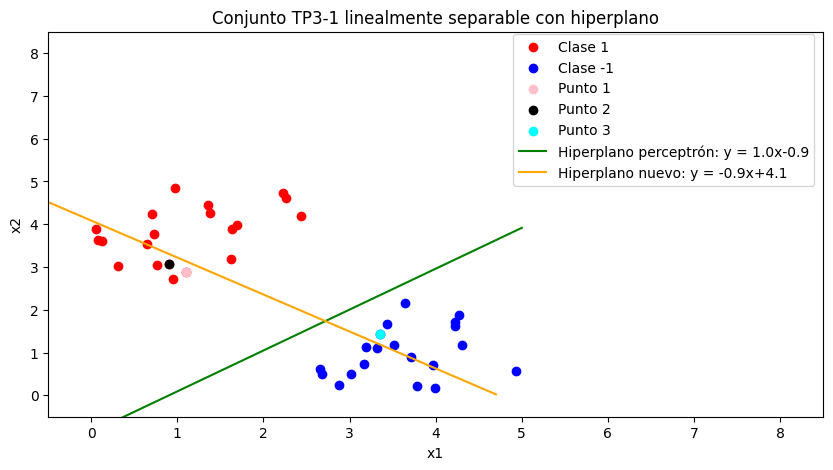

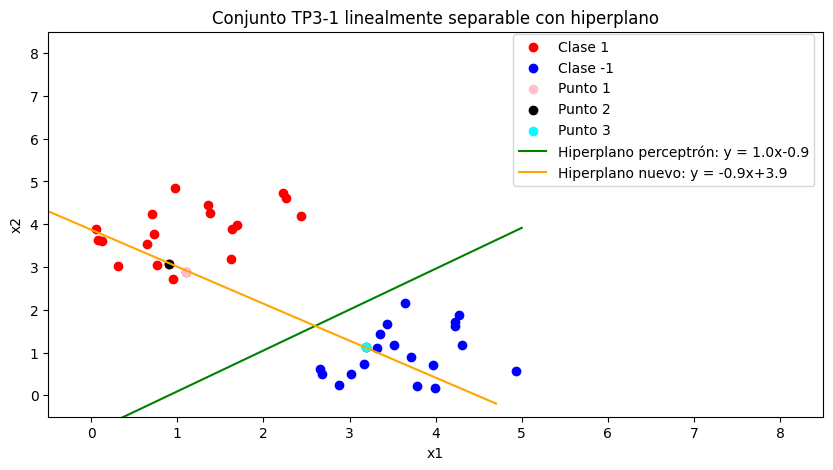

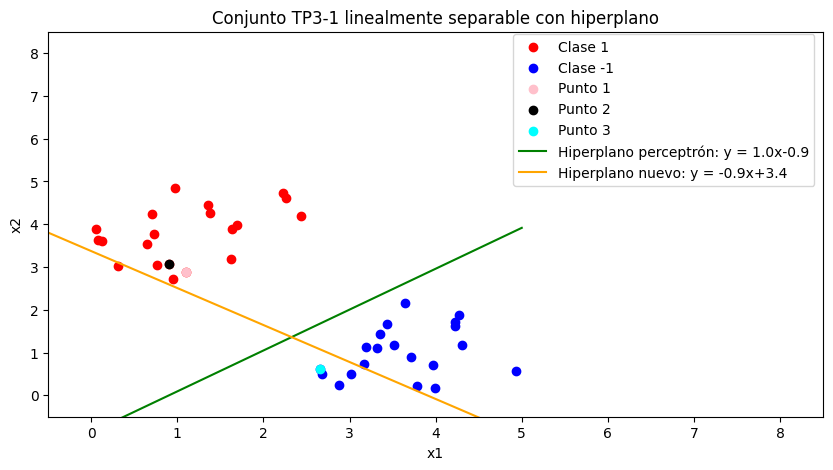

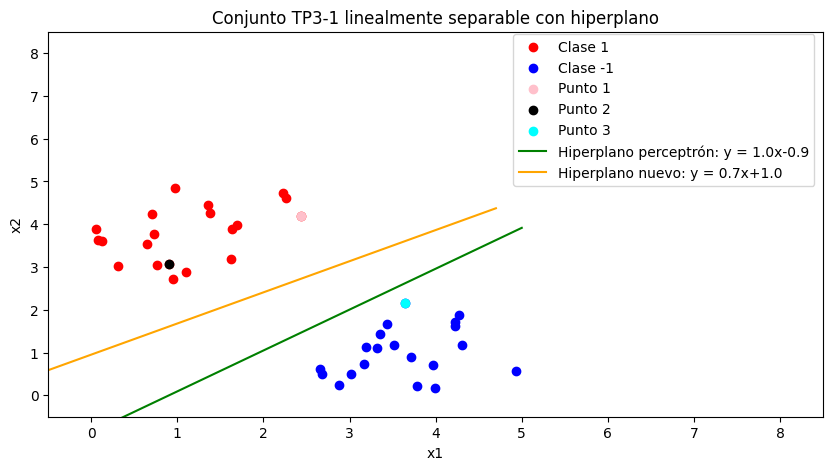

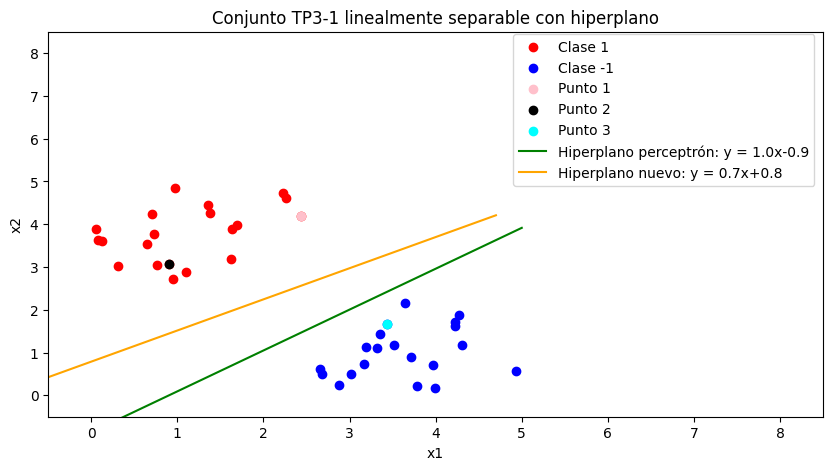

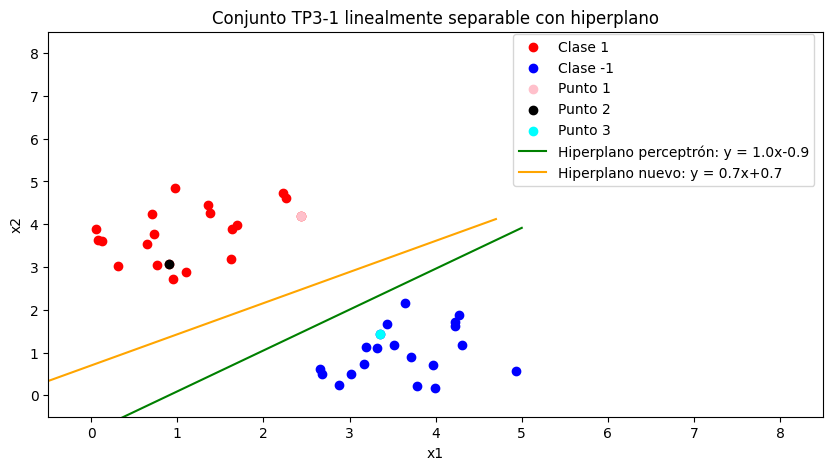

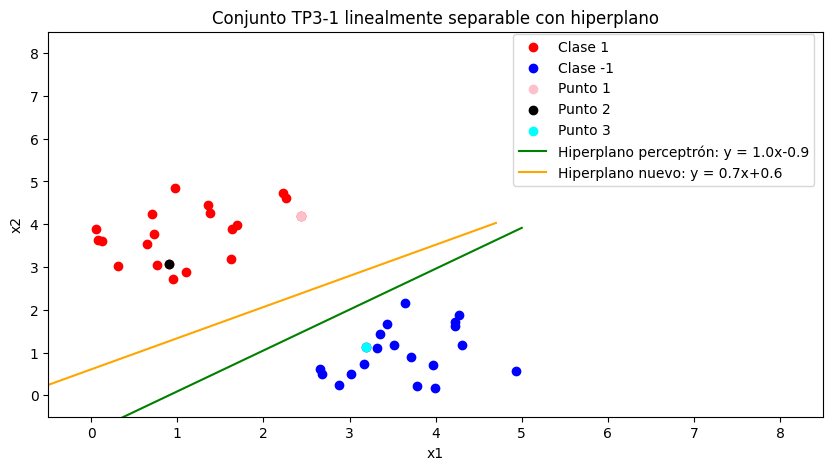

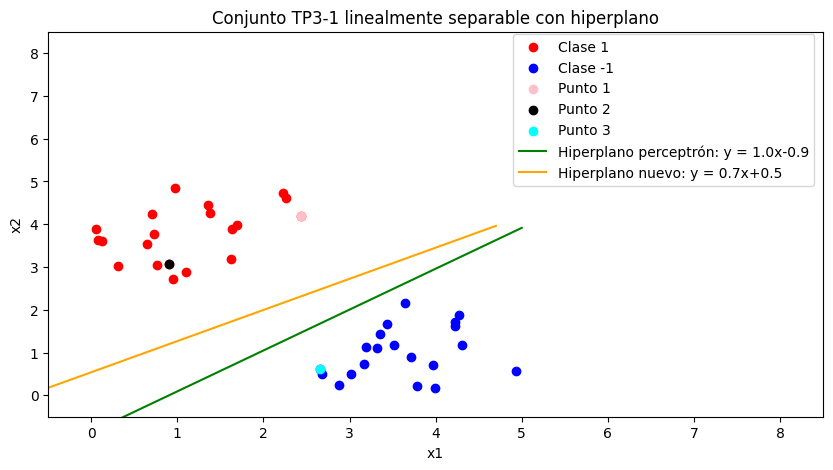

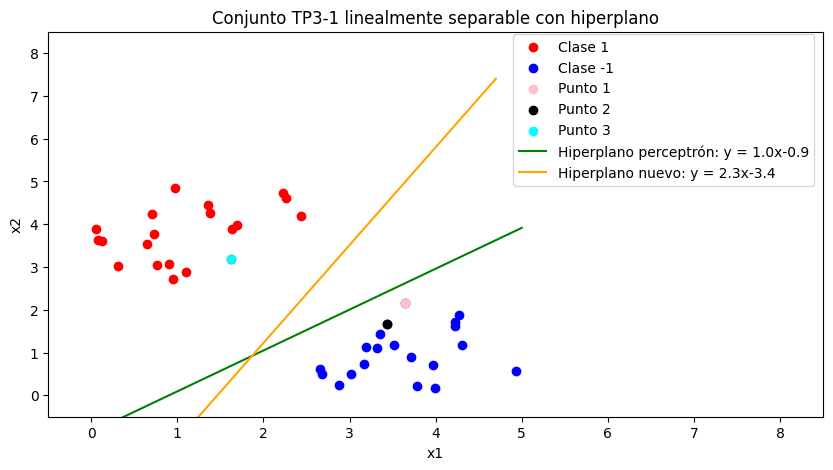

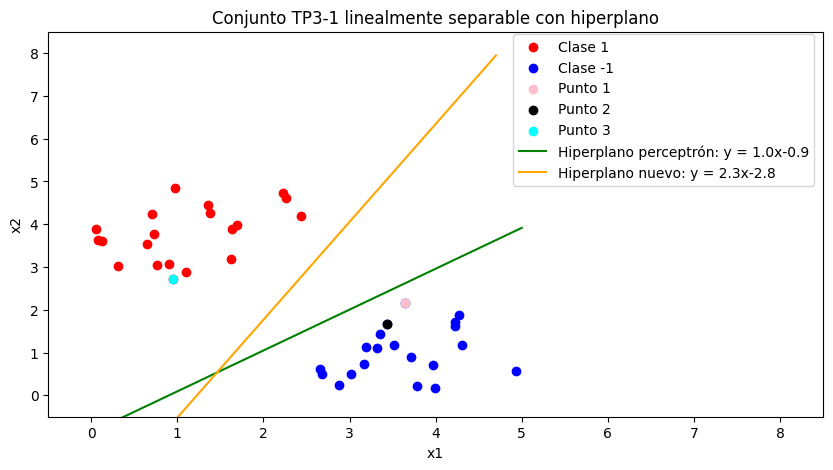

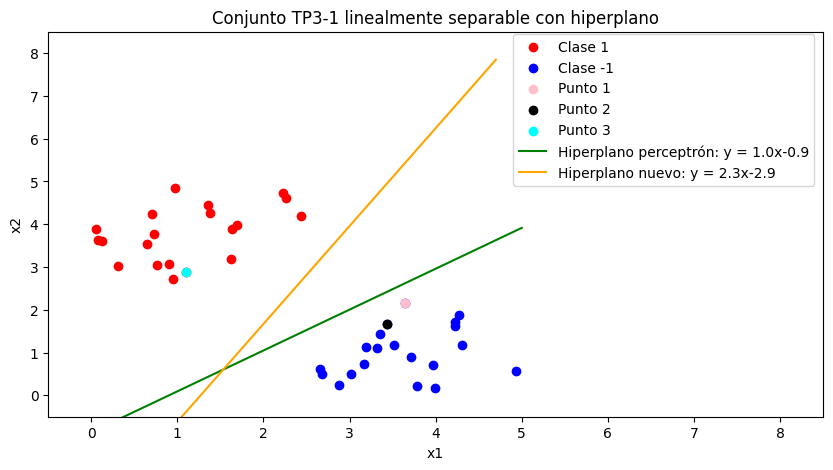

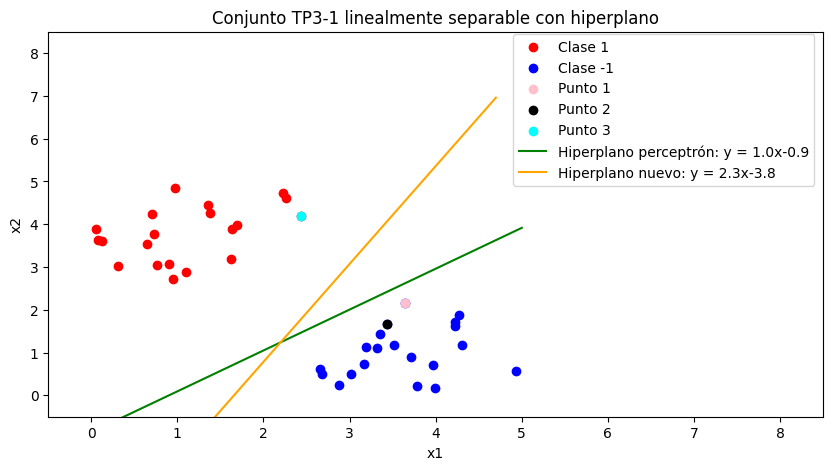

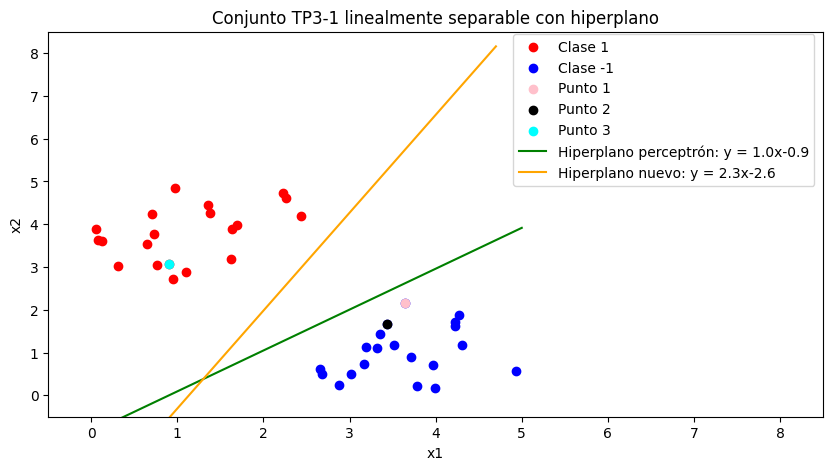

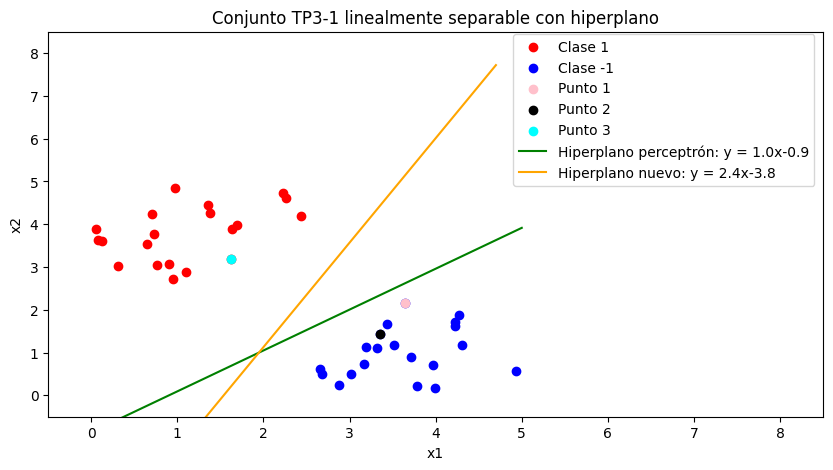

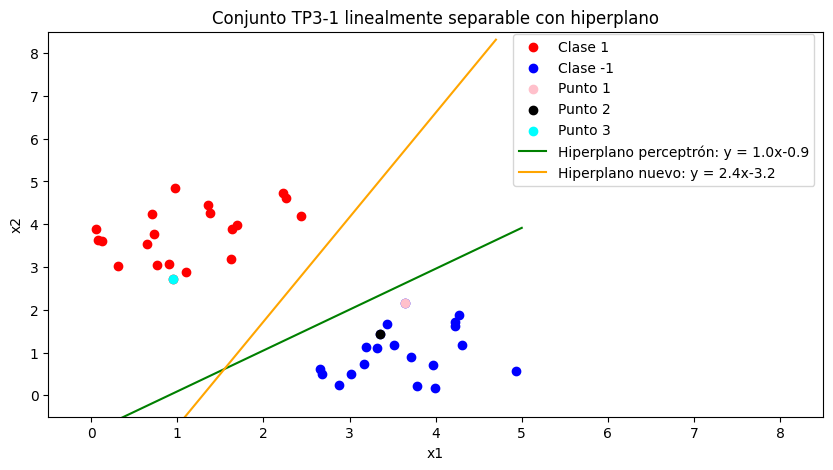

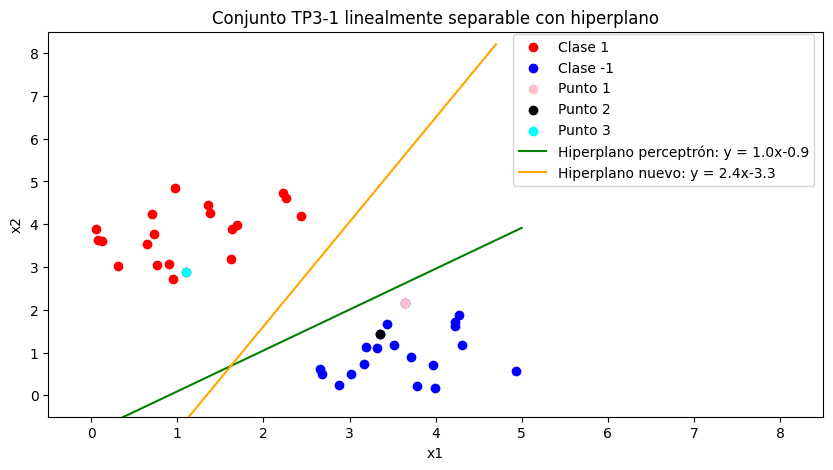

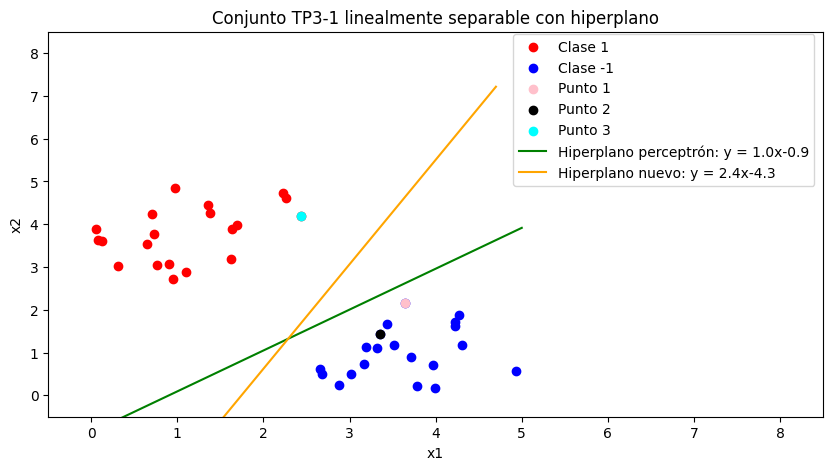

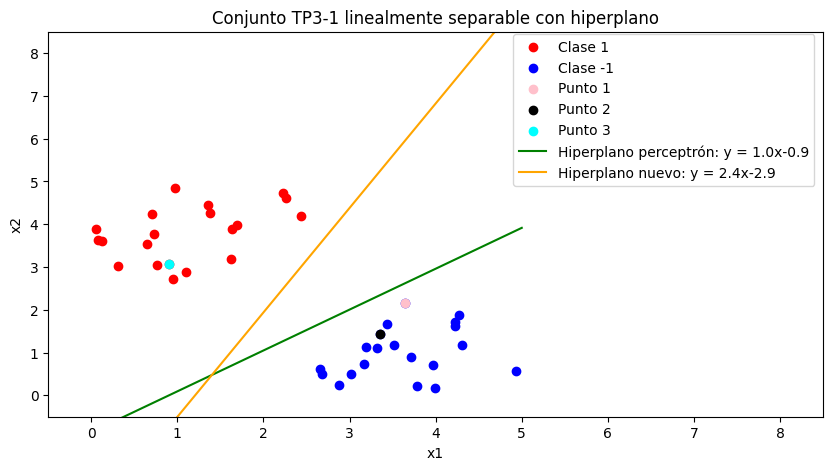

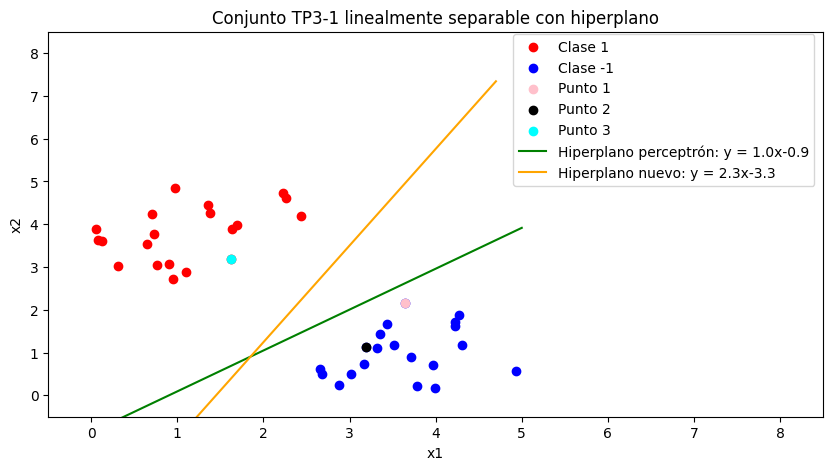

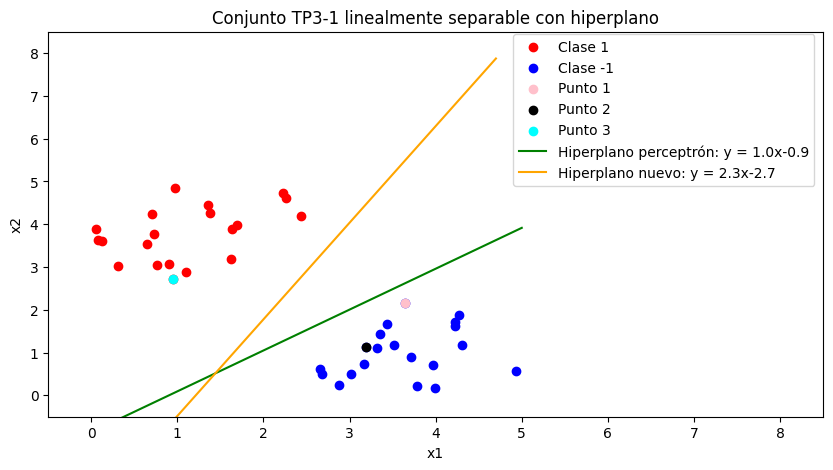

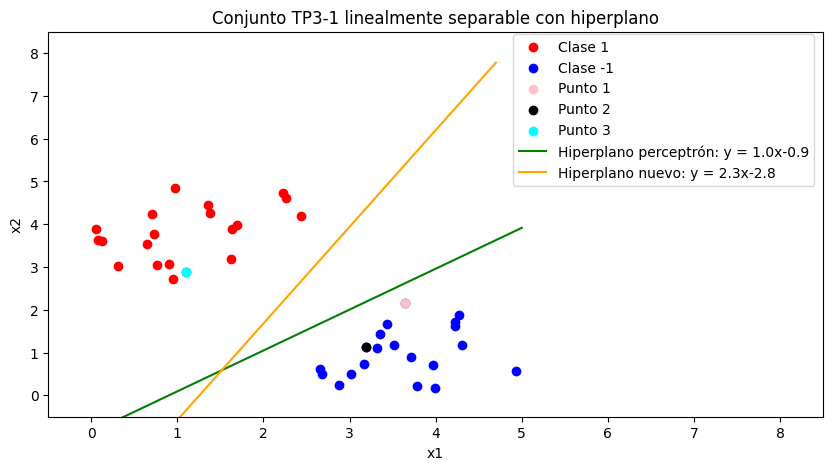

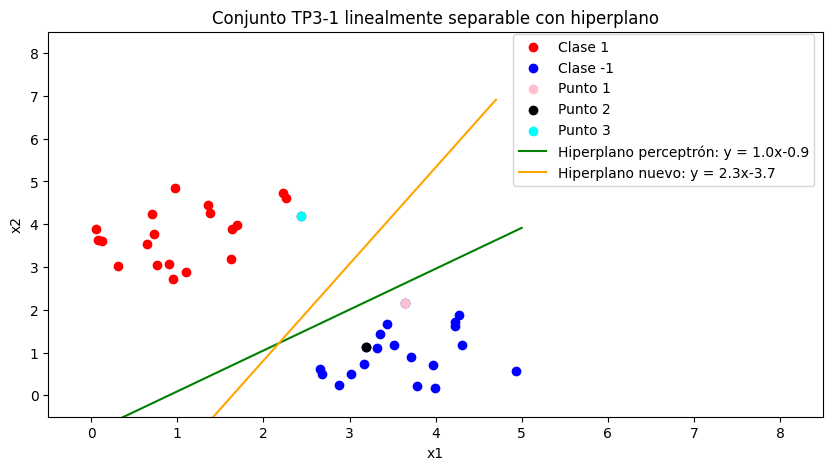

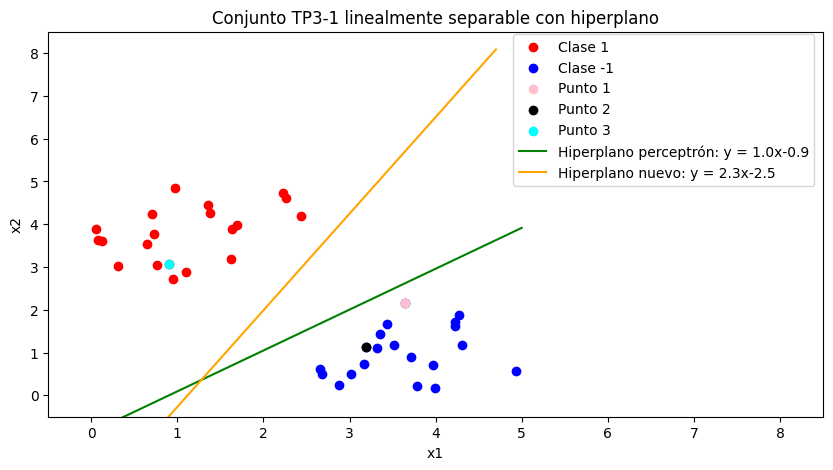

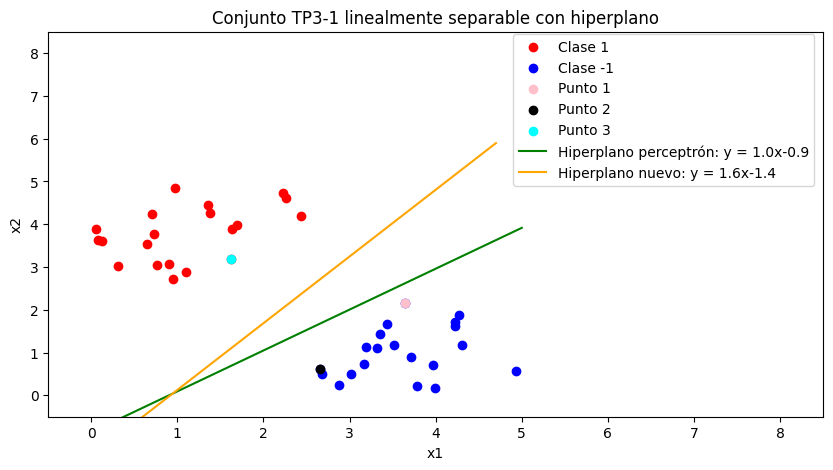

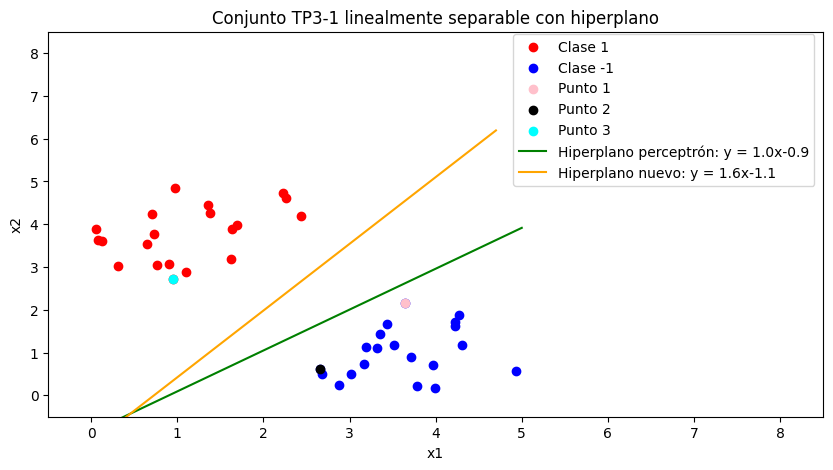

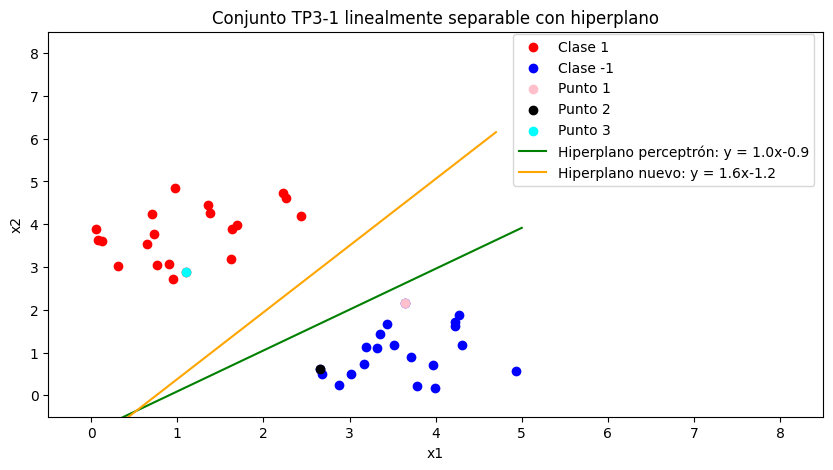

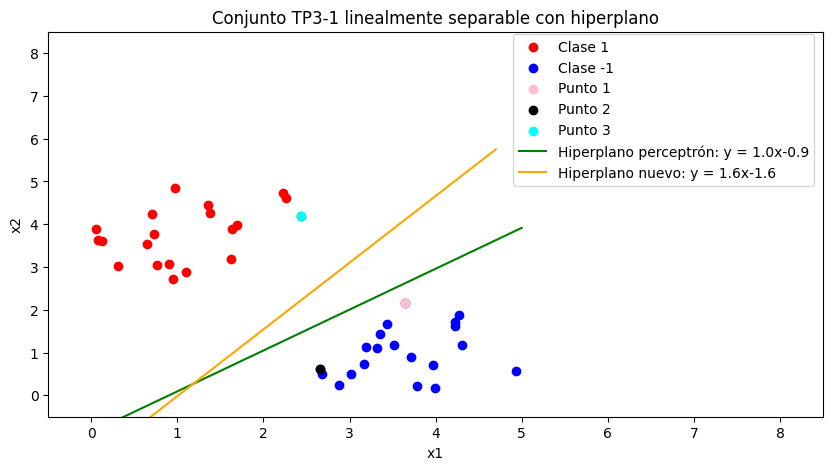

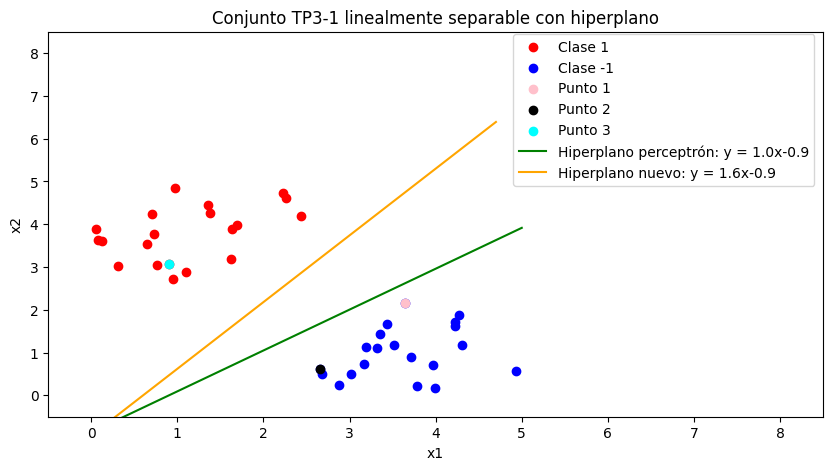

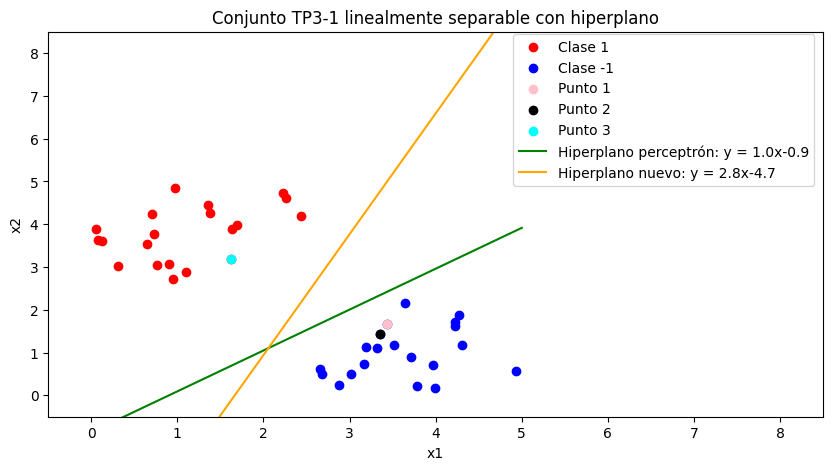

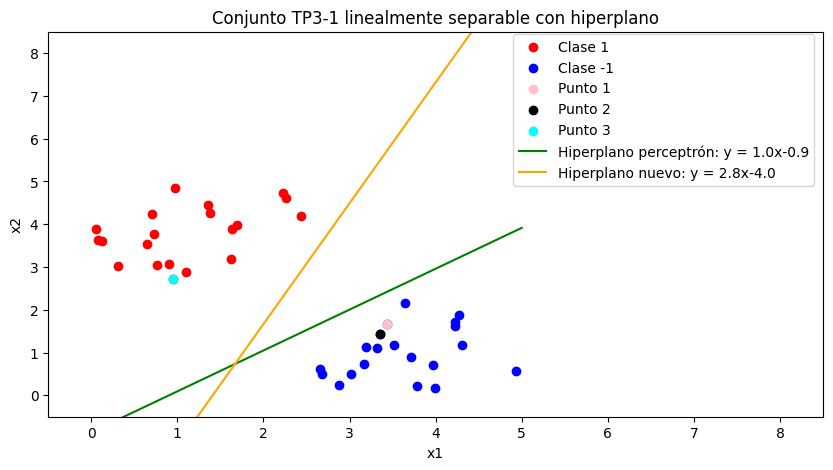

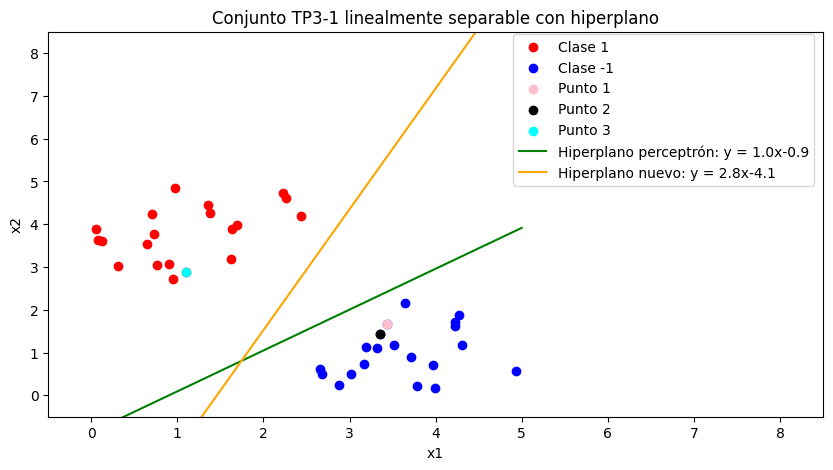

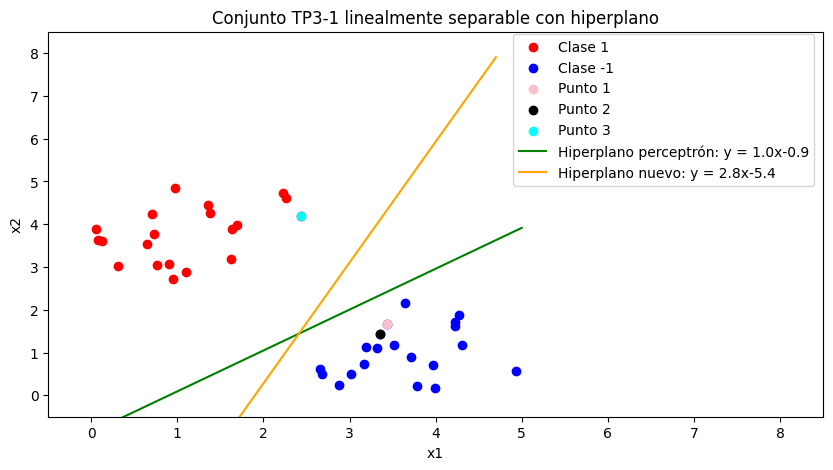

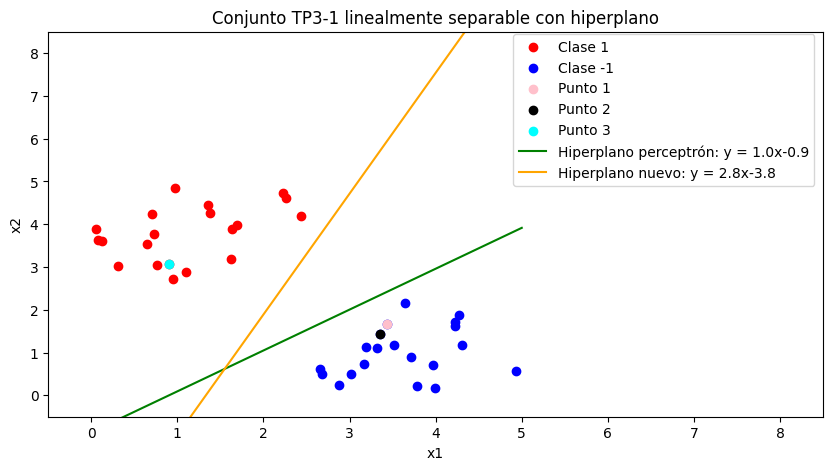

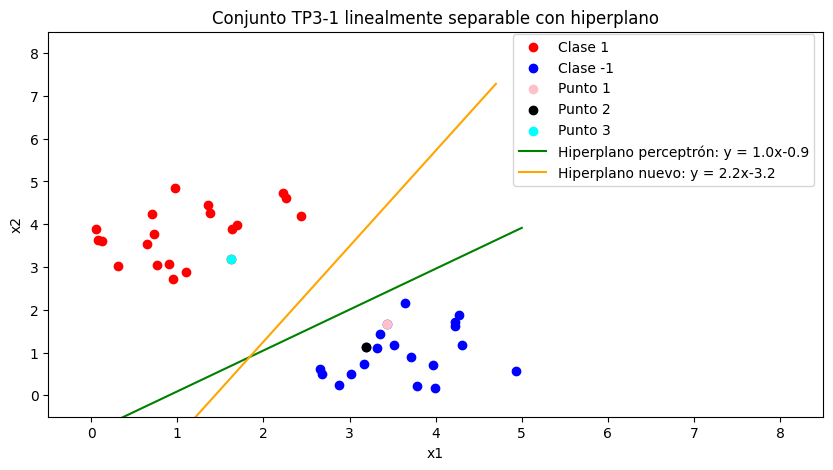

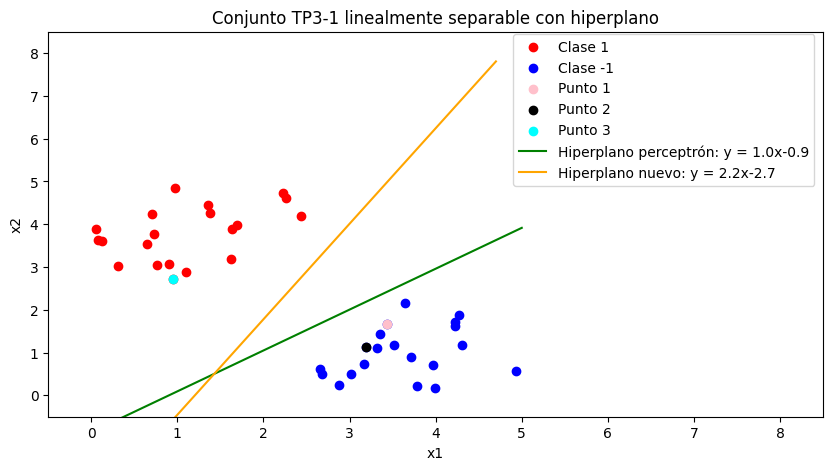

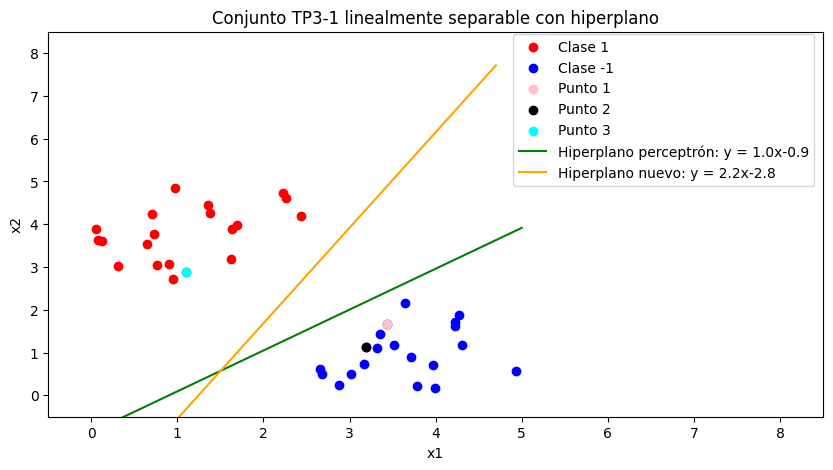

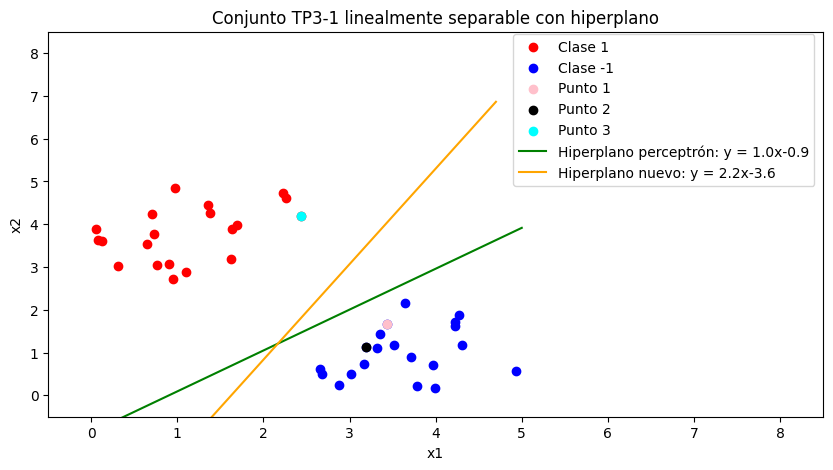

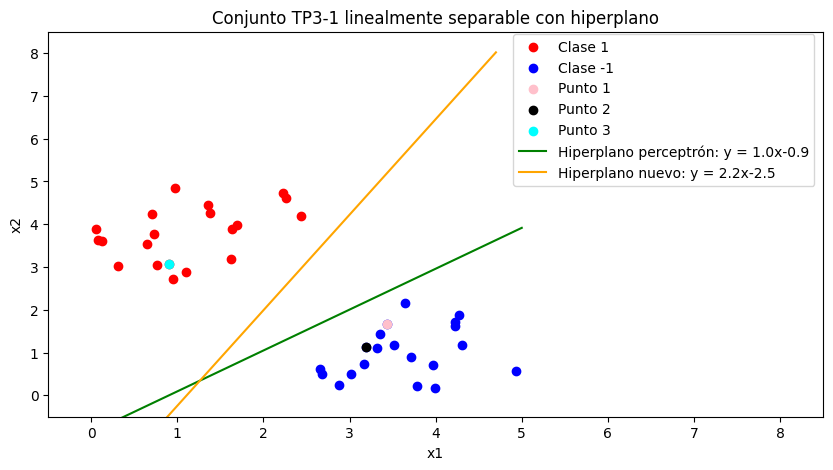

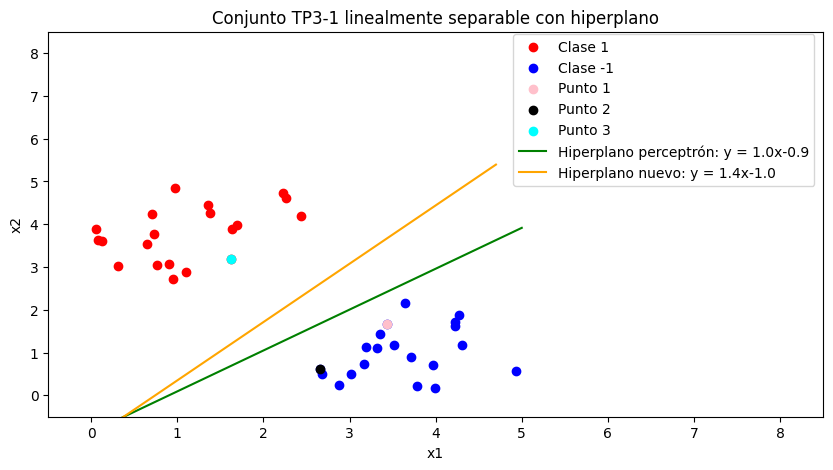

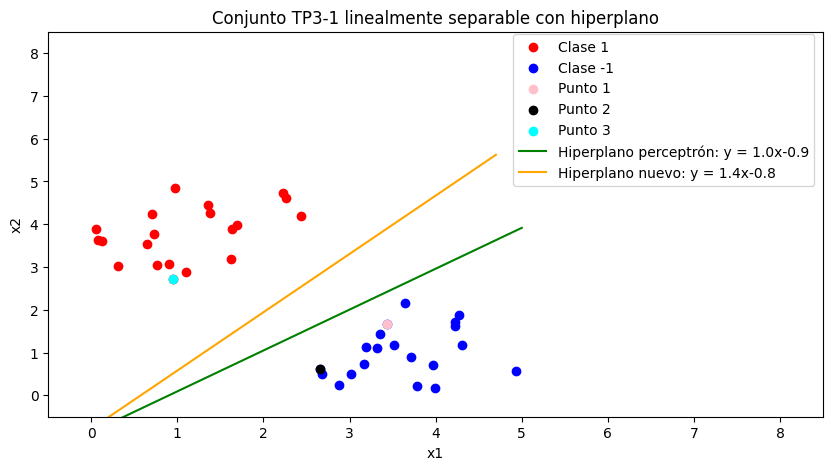

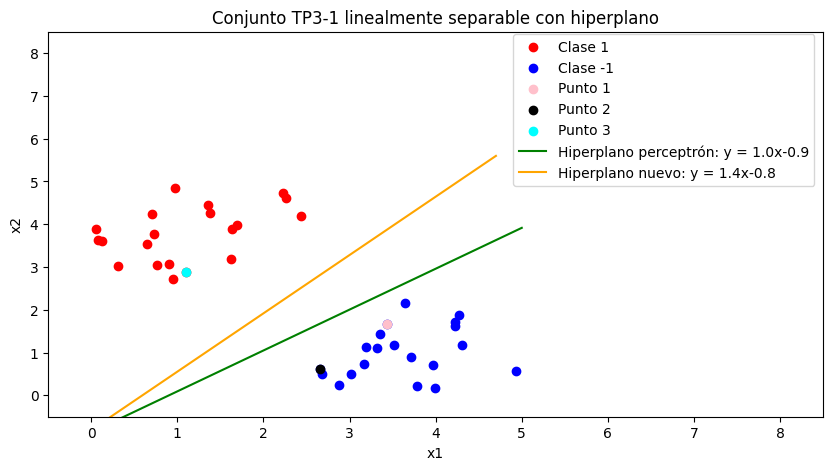

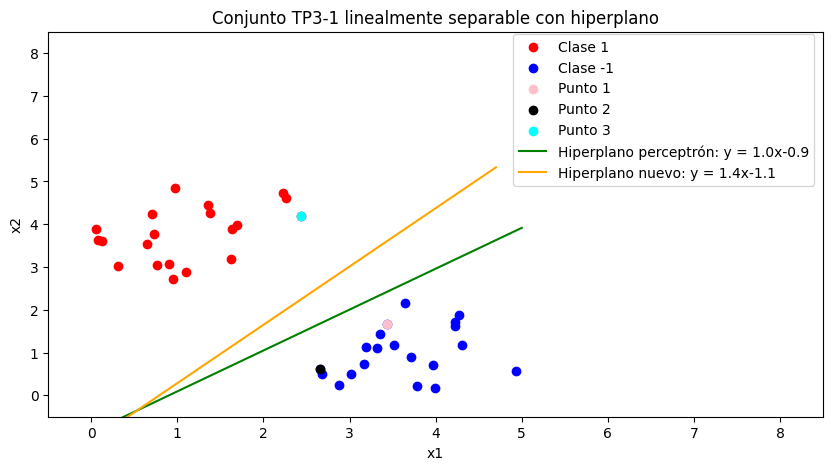

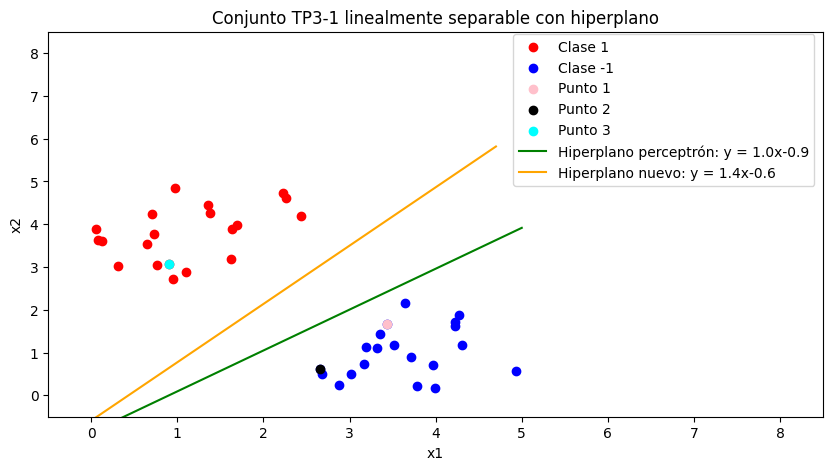

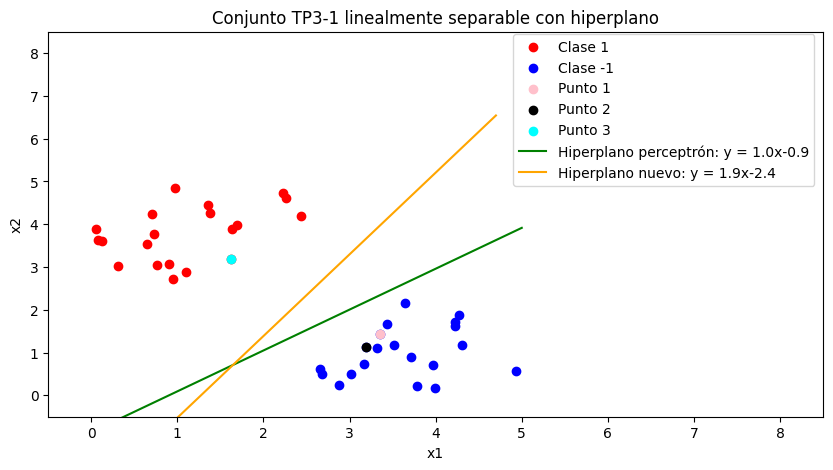

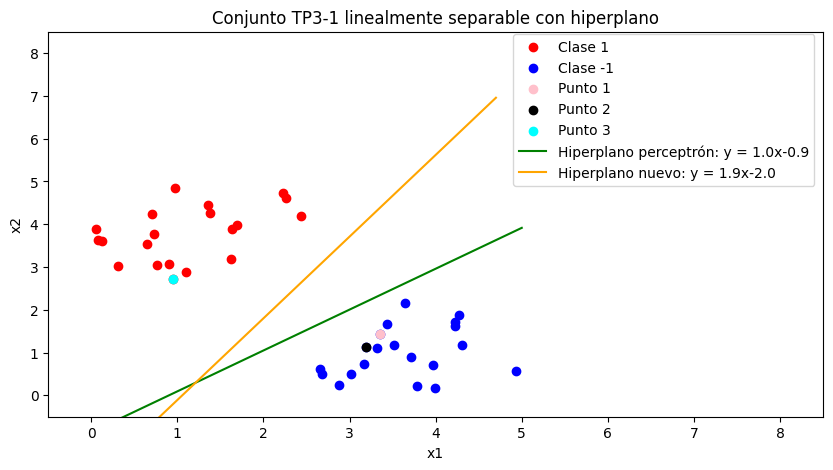

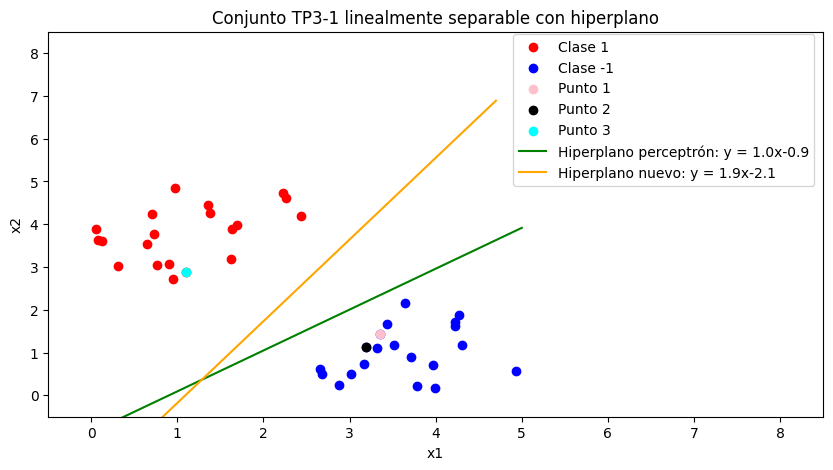

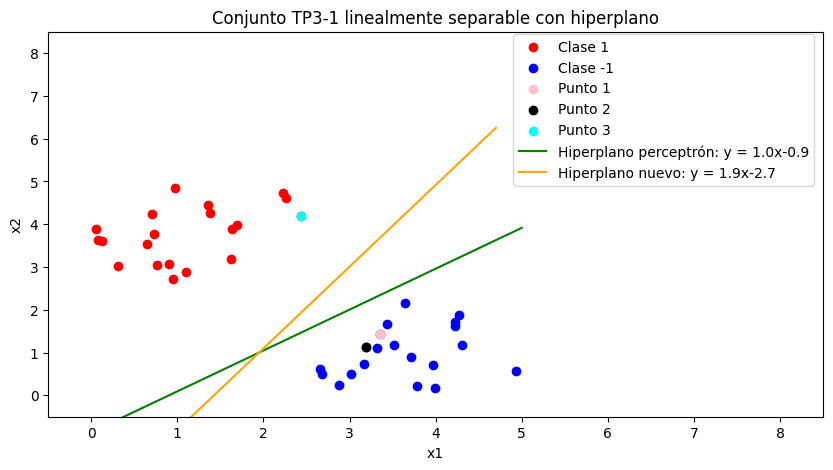

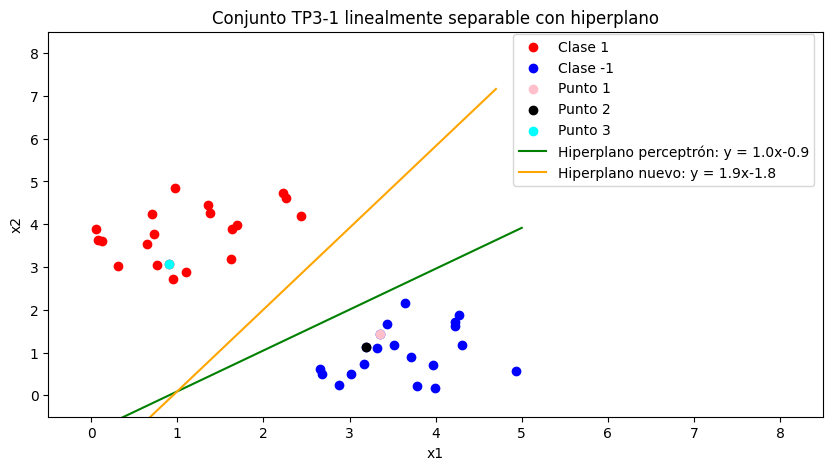

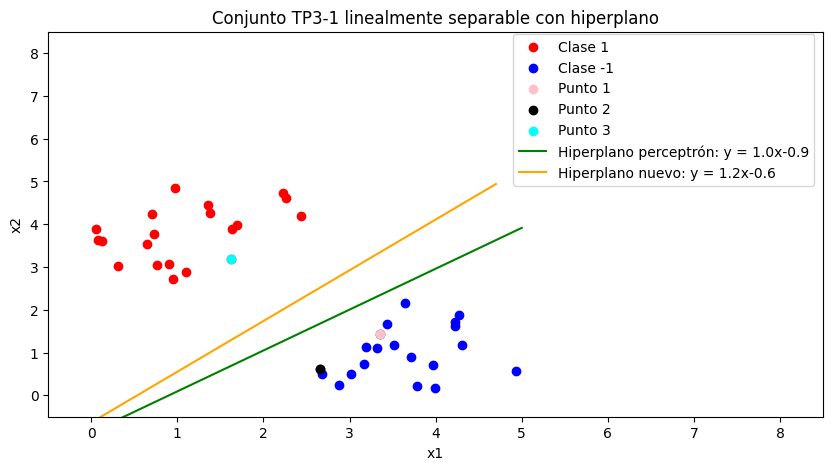

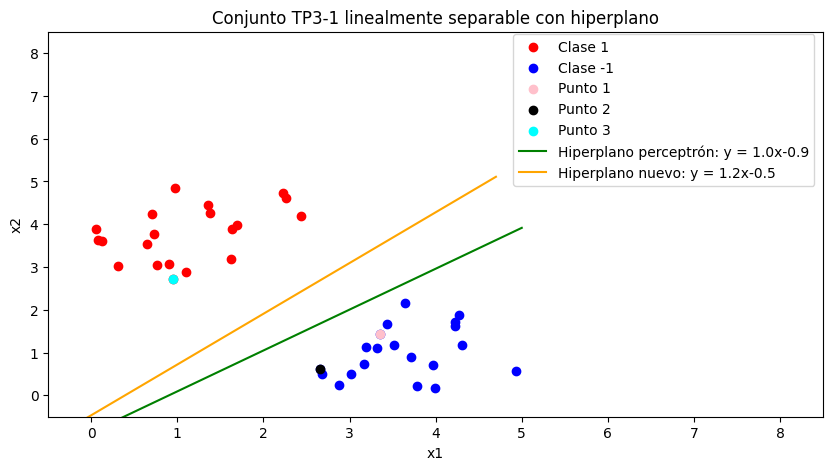

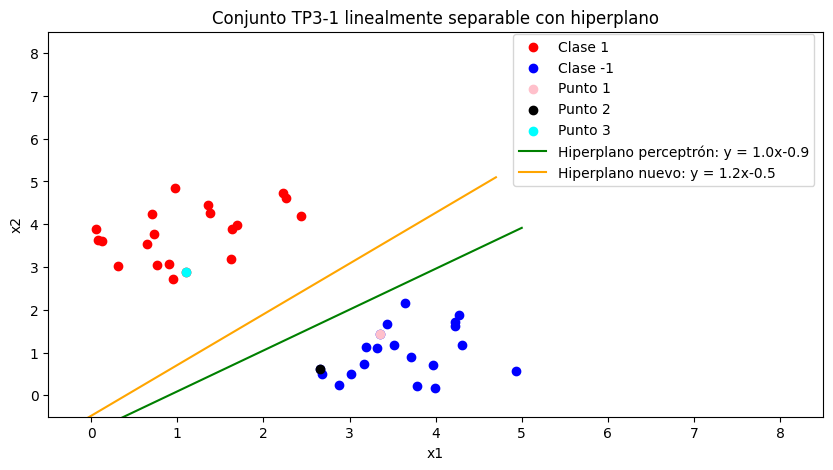

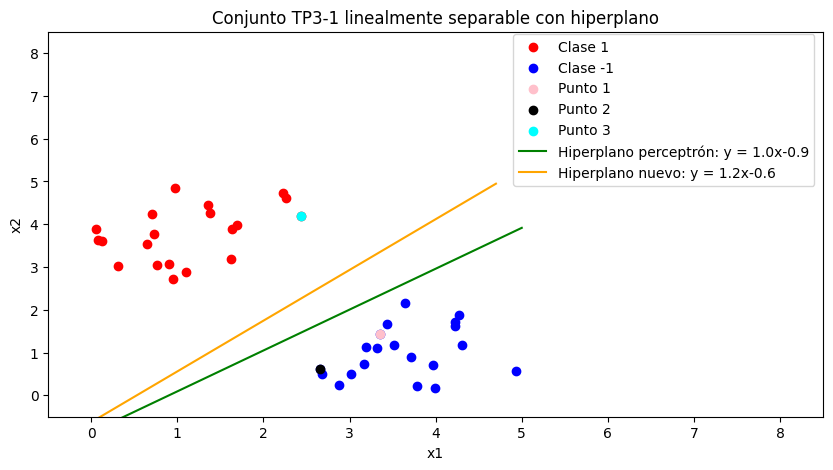

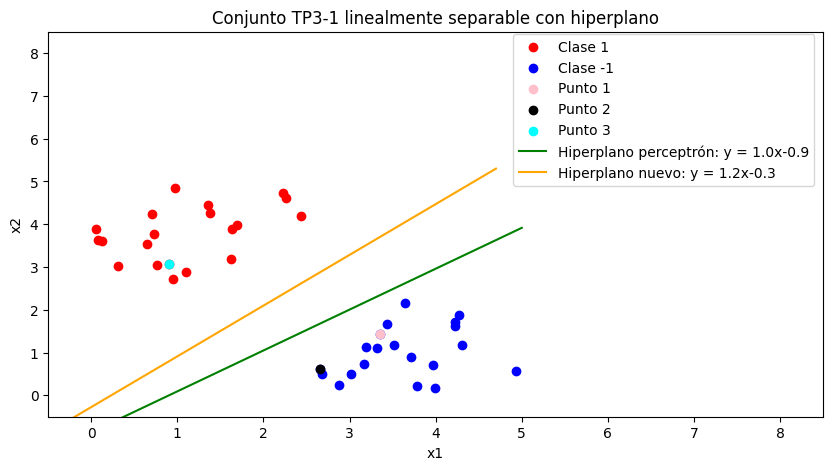

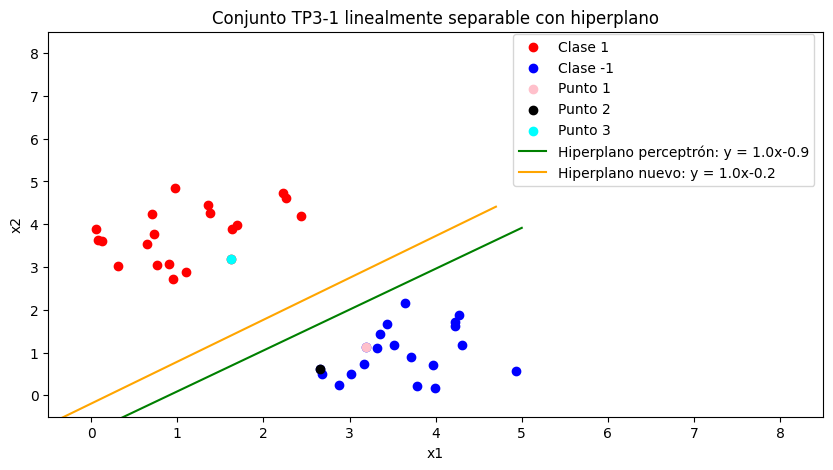

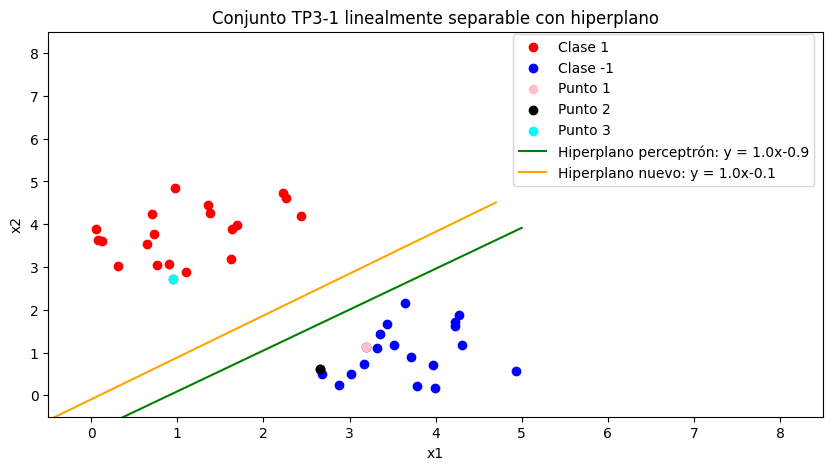

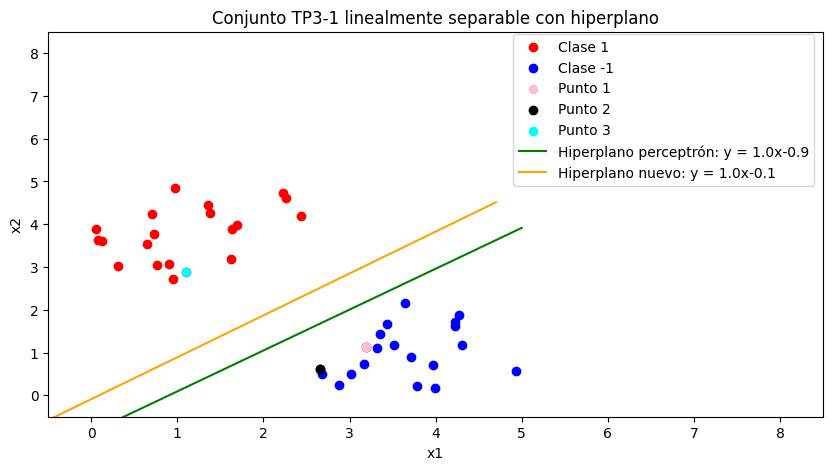

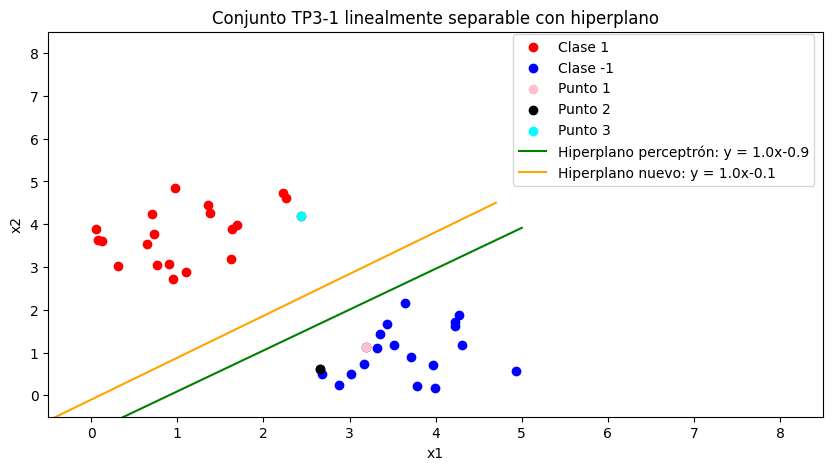

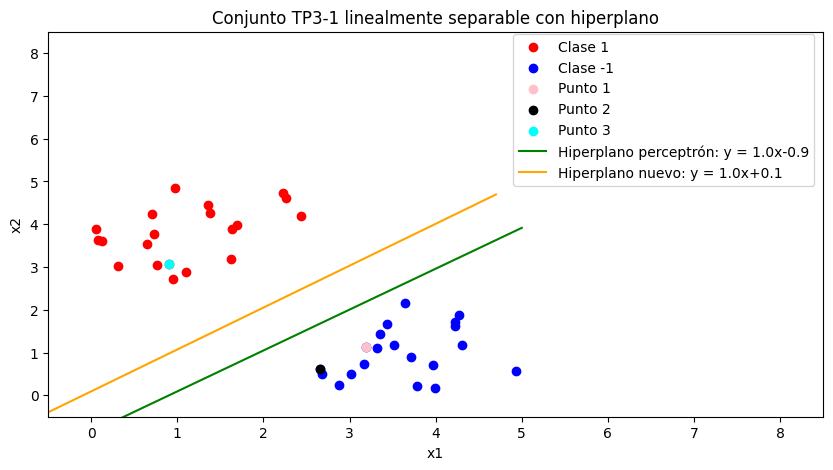

In [19]:
x = TP3_1[:, :2]
y = TP3_1[:, 2]

cant_puntos = len(x)
k = int(cant_puntos/2)

distancias = []

for point in x:
  distancia = calcularDistanciaRectaPunto(point, w_min_a)
  distancias.append(distancia)

distancias_1 = distancias[:k]
distancias_2 = distancias[k:]

l = 5
mas_cercanos_1 = masCercanos(x[:k], distancias_1, l)
mas_cercanos_2 = masCercanos(x[k:], distancias_2, l)

# Cambiar el conjunto de puntos: 
# Del primer conjunto se agarran 2 y del segundo 1.
puntos_1 = seleccionarPuntos(mas_cercanos_1, mas_cercanos_2)
puntos_2 = seleccionarPuntos(mas_cercanos_2, mas_cercanos_1)
puntos = puntos_1 + puntos_2

for combinacion in puntos:
  punto_1, punto_2, punto_3 = combinacion
  coef = calcularRecta(punto_1, punto_2)
  coef_normal = calcularNormal(coef, punto_3)
  punto_int = calcularInterseccion(coef, coef_normal)
  p_medio = calcularPuntoMedio(punto_int, punto_3)
  coef_paralela = calcularRectaParalela(coef, p_medio)
  m_p, b_p = coef_paralela
  graficarPuntosHiperplanoItemB(TP3_1, coef_paralela, w_min_a, combinacion, punto_int, p_medio)

Se tomaron 3 puntos para calcular el nuevo hiperplano: dos de una misma clase y uno de la otra. Primero se probó con dos puntos de la clase 1 y luego con la clase -1. El nuevo hiperplano que parece ser mejor que el obtenido con el perceptrón tiene la siguiente ecuación: $y = 1.2x - 0,5$. Esta se obtiene en ambas combinaciones de clases (con distintos puntos). A simple vista vemos que mejora el margen a ambas clases; se achica para la clase 1 y se agranda para la clase -1.

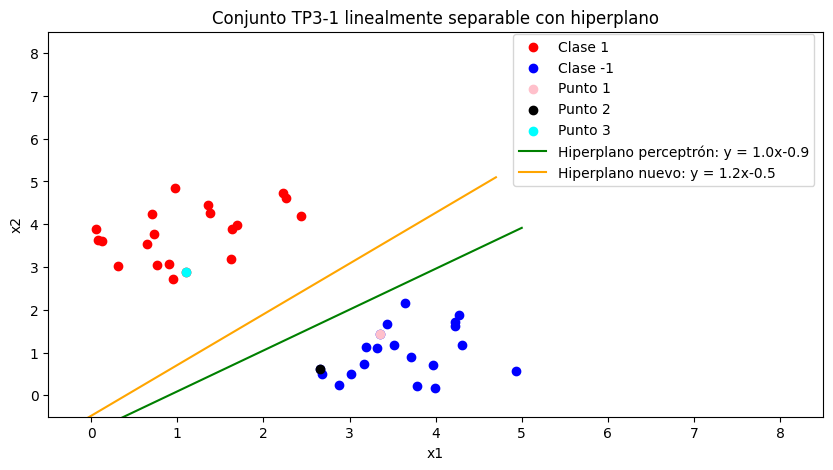

# Ítem c

## Construcción del conjunto TP3-2

El conjunto de datos para el ítem C se creó de la misma manera que el primer conjunto, pero se utilizaron 60 puntos y se arreglaron 4 “a mano” para así incluir 2 ejemplos mal clasificados de cada clase.

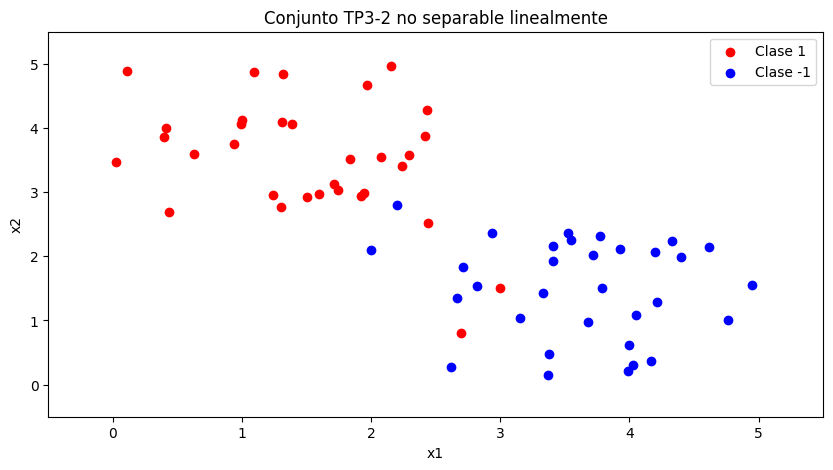

In [20]:
#No separable

np.random.seed(4) # 3
p = 60 # Cantidad de puntos
k = int(p/2)

# Generamos puntos aleatorios en el cuadrado [0,5]x[0,5]
TP3_2 = np.zeros((p+4,3)) # (x1, x2, clase)

TP3_2[:k,:2] = np.random.uniform([0,2.5], [2.5,5], size=(k,2)) 
TP3_2[k:k+2,:2] = ([2.7,0.8], [3, 1.5]) 
TP3_2[k+2:p+2,:2] = np.random.uniform([2.5,0], [5,2.5], size=(k,2)) 
TP3_2[p+2:,:2] = ([2,2.1], [2.2, 2.8]) 

TP3_2[:k+2,2] = 1
TP3_2[k+2:,2] = -1

plt.figure(figsize=(10,5))
plt.scatter(TP3_2[:k+2,0], TP3_2[:k+2,1], c='red', label='Clase 1')
plt.scatter(TP3_2[k+2:,0], TP3_2[k+2:,1], c='blue', label='Clase -1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-0.5,5.5])
plt.ylim([-0.5,5.5])
plt.title('Conjunto TP3-2 no separable linealmente')
plt.show()

## Perceptron

[-0.4879779   0.30970011  0.54      ]
m = 1.5756465094564005
b = -1.7436222400518544


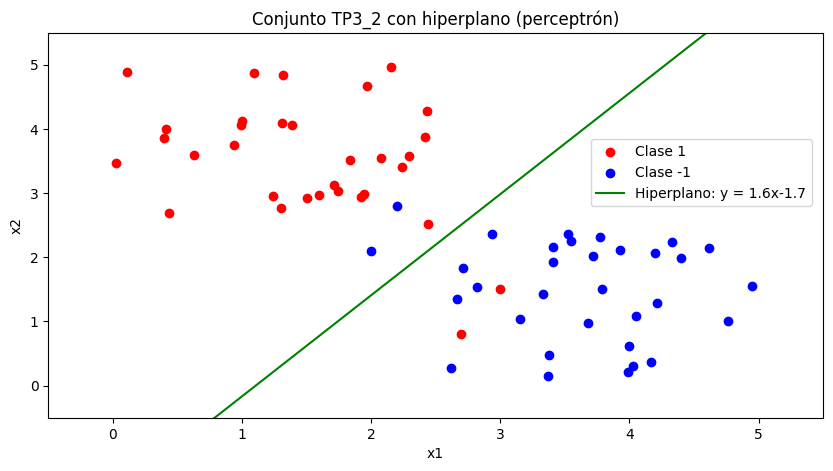

In [22]:
x_2 = TP3_2[:, :2]
y_2 = TP3_2[:, 2]
COTA = 2000
eta = 0.01

w_min_c = perceptron(x_2, y_2, COTA, eta, 5) # Con seed = 2 se obtiene otro hiperplano
print(w_min_c)
graficarPuntosHiperplano(TP3_2, w_min_c , "perceptrón", "TP3_2", [0.7,0.55])

Al aplicar el perceptrón, obtenemos este hiperplano. Como se esperaba, quedan algunos ejemplos mal clasificados, dos de cada lado, por lo que hay 4 puntos mal clasificados en total. Es importante mencionar que esto se obtiene para una cierta semilla (5), para otras, se obtiene otro hiperplano.


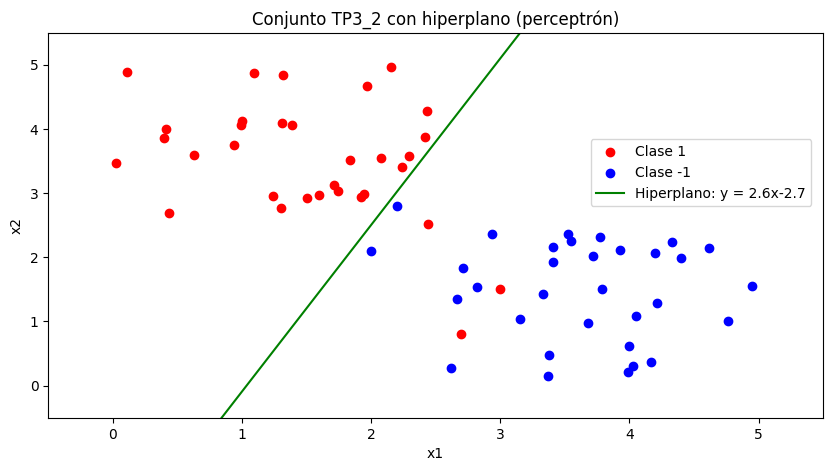

Este otro hiperplano, obtenido con otra semilla (2), clasifica mal 3 puntos rojos, los 2 que se agregaron a mano y el que está muy cerca de los dos puntos azules que se agregaron a mano. Vemos entonces que, como se esperaba, los 2 puntos rojos que se agregaron a mano se clasifican mal. 

# Ítem d

## Método SVM

Estos son los pasos que sigue el algoritmo de SVM:

1. Primero inicializamos las variables que vamos a utilizar; a diferencia del perceptrón aquí también tenemos el b y b_min, el eta inicial y el eta (que irá variando), el número de épocas y las épocas máximas, y el costo y costo mínimo. Nuevamente C es parámetro de la función. 

2. El bucle while es controlado por el valor del costo y la cantidad de épocas. Se continúa ejecutando el código dentro de este bucle mientras el costo sea mayor a 0 y la cantidad de épocas sea menor a la cantidad máxima definida previamente.

3. Una vez dentro del while, se toma un elemento del conjunto de datos al azar como en el perceptrón. Nuevamente, el algoritmo es estocástico, sin embargo, para probar nuestro código, decidimos utilizar una semilla para así obtener resultados reproducibles.

4. Luego se actualiza el eta. Se utiliza la función exponencial e elevado a la menos 0,0001 por el número de época, y esto se multiplica por el eta inicial, establecido en 0,00001. De esta manera, el eta se hace más chico a lo largo del entrenamiento. Es posible que al principio los pesos estén lejos de los pesos óptimos, pero con cada iteración nos acercamos a los pesos óptimos, por lo que queremos hacerlo de a pasos más chicos (mayor precisión). 

5. Continuamos calculando el gradiente de w y b, con la función calcularGradiente. Luego se multiplica cada gradiente por el eta, lo cual se utiliza para obtener los nuevos valores de w y b.

6. Por último, se obtiene el costo, calculando el número de predicciones incorrectas. Si este costo es menor al costo mínimo, entonces este último se actualiza, al igual que el w mínimo y el b mínimo. De esta manera, cuando se salga del bucle while, la función devuelve el w y b mínimos, que se utilizarán para calcular el hiperplano.

Para el cálculo del gradiente, primero se calcula t. Por un lado tenemos el producto escalar entre w y x, luego le sumamos b y eso los multiplicamos por la clase del elemento. El gradiente de w es la derivada de L con respecto a w, y el de b es la derivada de L con respecto a b. Si t es igual o mayor a 1, el gradiente de w es igual a w, mientras que el de b es 0. En este caso el punto está bien clasificado. En el caso contrario, cuando t es menor a 1, el punto está mal clasificado. Finalmente estos gradientes se multiplican por el eta y se restan al w y b, según corresponda, para actualizar estos valores.


In [23]:
def calcularGradiente(w, b, X, Y, C):
  t = Y*(np.dot(w,X)+b)
  di = 0
  bi = 0

  if t >= 1:
    di = w
    bi = 0
  
  else:
    di = w - (C*Y*X)
    bi = (C*Y*-1)

  return di, bi

def calcularCosto(w, b, x, y, p):
  error = 0

  for i in range(p):
    y_calc = np.sign(np.dot(x[i], w))
    if y_calc != y[i]: # El error es la cantidad de predicciones incorrectas
      error += 1

  return error

def SVM(x, y, C, seed):
  max_epochs = 1000
  epoch = 0
  p, N = x.shape
  w = np.ones(N) # se puede inicializar con valores aleatorios
  b = 0
  w_min = w.copy()
  b_min = b
  eta = 0.00001
  eta_inicial = eta
  costo_min = float("inf")
  costo = 1
  np.random.seed(seed)

  while epoch <= max_epochs and costo > 0:
    eta = eta_inicial * np.exp(-0.0001*epoch)
    
    i_x = np.random.randint(p) 
    X = x[i_x]
    Y = y[i_x]

    w_gradiente, b_gradiente = calcularGradiente(w, b, X, Y, C)

    w = w - (eta * w_gradiente)
    b = b - (eta * b_gradiente)

    costo = calcularCosto(w, b, x, y, p)
    
    if costo < costo_min:
      costo_min = costo # Actualizar el costo mínimo
      w_min = w.copy() # Actualizar el vector de pesos mínimo
      b_min = b
    
    epoch += 1

  return w_min, b_min

In [24]:
def graficarPuntosHiperplanoItemD(puntos, w_min_p, w_min_SVM, nombre_conj, ubicacion):
  cant_puntos = len(puntos)
  k = int(cant_puntos/2)

  # Perceptron
  m_p = w_min_p[0]/(-w_min_p[1]) # -w_1/w_2
  b_p = -w_min_p[2]/(w_min_p[1]) # -w_0/w_2
  valores_x_p = np.linspace(-0.5, 7, cant_puntos)
  valores_y_p = m_p*valores_x_p + b_p # Recta obtenida por el perceptron

  # SVM
  m_SVM = w_min_SVM[0]/(-w_min_SVM[1]) # -w_1/w_2
  b_SVM = -w_min_SVM[2]/(w_min_SVM[1]) # -w_0/w_2
  valores_x_SVM = np.linspace(-0.5, 7, cant_puntos)
  valores_y_SVM = m_SVM*valores_x_SVM + b_SVM # Recta obtenida por SVM

  plt.figure(figsize=(10,5))
  plt.scatter(puntos[:k,0], puntos[:k,1], c='red', label='Clase 1')
  plt.scatter(puntos[k:,0], puntos[k:,1], c='blue', label='Clase -1') # Puntos del conjunto
  # Hiperplano obtenido con perceptron
  if b_p<0:
    plt.plot(valores_x_p, valores_y_p, "orange", label=f"Hiperplano perceptrón: y = {round(m_p,1)}x{round(b_p,1)}") 
  elif b_p>0:
    plt.plot(valores_x_p, valores_y_p, "orange", label=f"Hiperplano perceptrón: y = {round(m_p,1)}x+{round(b_p,1)}")
  else:
    plt.plot(valores_x_p, valores_y_p, "orange", label=f"Hiperplano perceptrón: y = {round(m_p,1)}x") 
  # Hiperplano obtenido con SVM
  if b_SVM<0:
    plt.plot(valores_x_SVM, valores_y_SVM, "green", label=f"Hiperplano SVM: y = {round(m_SVM,1)}x{round(b_SVM,1)}") 
  elif b_SVM>0:
    plt.plot(valores_x_SVM, valores_y_SVM, "green", label=f"Hiperplano SVM: y = {round(m_SVM,1)}x+{round(b_SVM,1)}")
  else:
    plt.plot(valores_x_SVM, valores_y_SVM, "green", label=f"Hiperplano SVM: y = {round(m_SVM,1)}x") 
  plt.legend(loc=ubicacion)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.xlim([-0.5,5.5])
  plt.ylim([-0.5,7])
  plt.title(f'Conjunto {nombre_conj} con hiperplanos')
  plt.show()

  return

## TP3_1

[-0.3514032   0.59397629], -0.37951808533157383
m = 0.5916115022257807
b = 0.6389448406563636


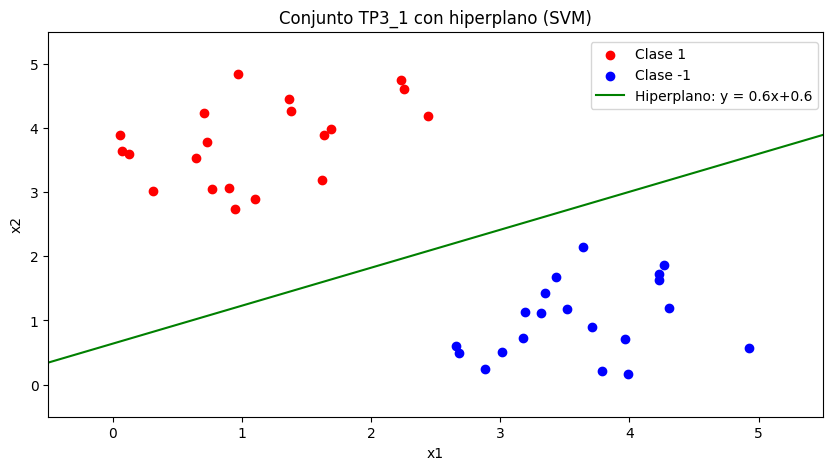

In [25]:
x = TP3_1[:, :2]
y = TP3_1[:, 2]
C = 100
seed = 3

w_min_d_1, b_min_d_1 =  SVM(x, y, C, seed)
print(f"{w_min_d_1}, {b_min_d_1}")

graficarPuntosHiperplano(TP3_1, np.append(w_min_d_1, b_min_d_1), "SVM", "TP3_1", [0.7,0.8])

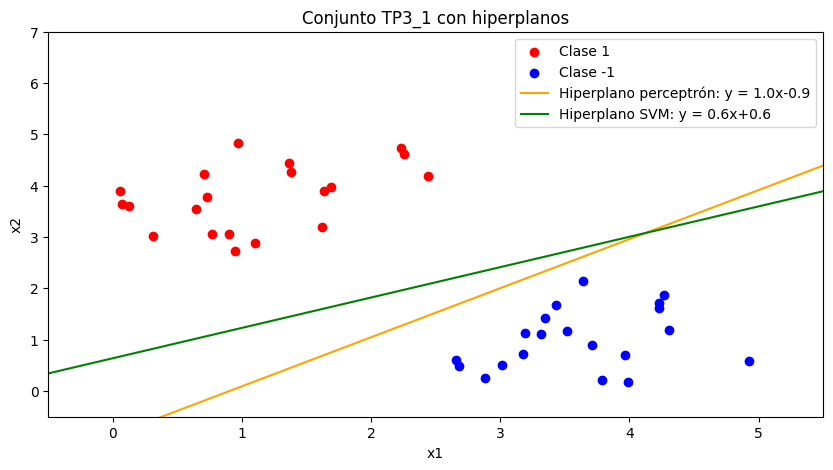

In [26]:
graficarPuntosHiperplanoItemD(TP3_1, w_min_a, np.append(w_min_d_1, b_min_d_1), "TP3_1", "upper right")

## TP3_2

[-0.34128864  0.50028921], -0.3549408435919232
m = 0.6821827017161388
b = 0.709471320261342


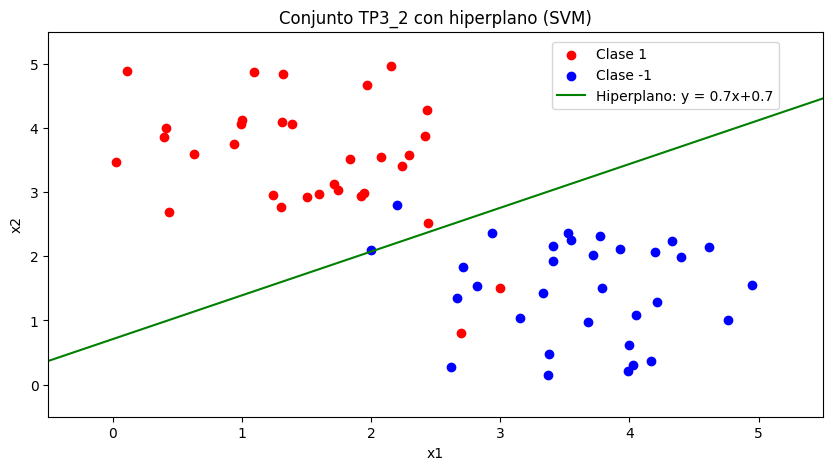

In [27]:
x = TP3_2[:, :2]
y = TP3_2[:, 2]
C = 100
seed = 5

w_min_d_2, b_min_d_2 =  SVM(x, y, C, seed)
print(f"{w_min_d_2}, {b_min_d_2}")

graficarPuntosHiperplano(TP3_2, np.append(w_min_d_2, b_min_d_2), "SVM", "TP3_2", [0.65,0.8])

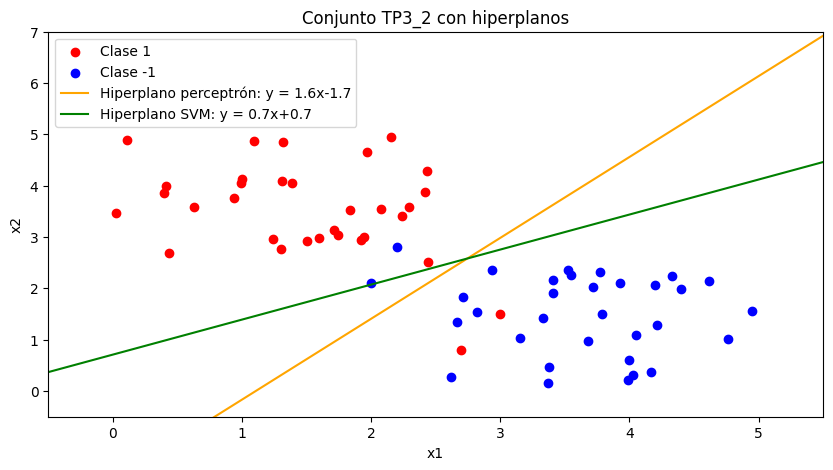

In [ ]:
graficarPuntosHiperplanoItemD(TP3_2, w_min_c, np.append(w_min_d_2, b_min_d_2), "TP3_2", "upper left")

## Vaca

### Cargar imagenes

In [ ]:
# Hay que cargar las imágenes a Archivos
imagen = cv2.imread('/content/cow.jpg',1) #con 1 la leemos a color
imagen_RGB = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

cielo = cv2.imread('/content/cielo.jpg',1)
cielo_RGB = cv2.cvtColor(cielo, cv2.COLOR_BGR2RGB)

pasto = cv2.imread('/content/pasto.jpg',1)
pasto_RGB = cv2.cvtColor(pasto, cv2.COLOR_BGR2RGB)

vaca = cv2.imread('/content/vaca.jpg',1)
vaca_RGB = cv2.cvtColor(vaca, cv2.COLOR_BGR2RGB)

### Crear conjunto de datos

In [ ]:
def agregarColumna(matriz, k):
  altura, ancho, canales = matriz.shape
  matriz_2d = np.reshape(matriz, (altura * ancho, canales))
  nueva_mat = np.hstack((matriz_2d, np.full((matriz_2d.shape[0], 1), k)))
  return nueva_mat

In [ ]:
# Vaca clase 1, pasto clase -1, cielo clase -1
vaca_mat = agregarColumna(vaca_RGB, 1)
pasto_mat = agregarColumna(pasto_RGB, -1)
cielo_mat = agregarColumna(cielo_RGB, -1)
datos = np.concatenate((vaca_mat, pasto_mat, cielo_mat), axis=0)

In [ ]:
x = datos[:, :3]
y = datos[:, 3]
C = 100
seed = 5

w_min_v, b_min_v = SVM(x, y, C, seed) # tarda unos 10/11 minutos 
print(f"{w_min_v}, {b_min_v}")

[ 1.56964149 -1.3750275  -0.2218596 ], 0.01096114031305532


In [ ]:
altura, ancho, canales = imagen_RGB.shape
imagen_rs = np.reshape(imagen_RGB, (altura * ancho, canales))
y_calc = []
for i in range(len(imagen_rs)):
  y_calc.append(np.sign(np.dot(imagen_rs[i], w_min_v)))

## Con librería

In [ ]:
df_datos = pd.DataFrame(datos, columns=["R", "G", "B", "Clase"])
datos_1 = df_datos.sample(frac = 1, random_state=1).reset_index(drop = True) # Mezclar los datos
test_size = 0.2 # Fracción del tamaño del conjunto de prueba
l = int(test_size*len(datos_1))
datos_test = datos_1[:l].reset_index(drop = True)
datos_train = datos_1[l:].reset_index(drop = True)
x_train = datos_train.iloc[:, :3]
y_train = datos_train["Clase"]
x_test = datos_test.iloc[:, :3]
y_test = datos_test["Clase"]

clf = svm.LinearSVC(C = 1000, max_iter = 5000)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

altura, ancho, canales = imagen_RGB.shape
imagen_rs = np.reshape(imagen_RGB, (altura * ancho, canales))
df_imagen = pd.DataFrame(imagen_rs, columns=["R", "G", "B"])
y_pred = np.array(clf.predict(df_imagen))

## Comparación

In [ ]:
error = 0
for i in range(len(y_calc)):
  if y_calc[i] != y_pred[i]:
    error+=1

print(f"Error: {round(100*error/len(y_calc),2)}%")

Error: 5.25%


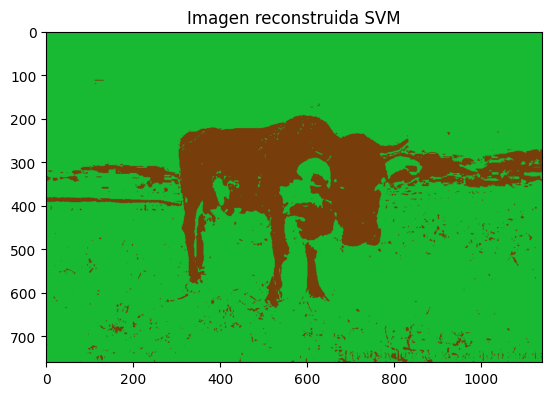

In [ ]:
imagen_pred = np.array(y_calc).reshape(np.shape(imagen[:,:,0]))

marron = np.array([119, 61, 11])
verde = np.array([24, 185, 51])

colores = np.zeros_like(imagen)
colores[np.where(imagen_pred == 1)] = marron
colores[np.where(imagen_pred == -1)] = verde

plt.figure()
plt.imshow(colores.astype(int))
plt.title("Imagen reconstruida SVM")
plt.show()

Se utilizó el algoritmo de SVM para separar los píxels que componen a la imagen de la vaca en las clases vaca (1) y no vaca (-1). Para esto se utilizó primero la función Linear SVM de ScikitLearn para clasificar los datos en las dos clases, por lo que el resultado final contiene los errores de esta función y el algoritmo de SVM propio.